**Name:** Mr Chris Nkem-Ike **<span style="padding-left: 135px;">Module:</span>** 6CS031/UM1 - Cyber Threat Intelligence **<span style="padding-left: 135px;">Student Number:</span>** 182 4861

# **<center><u><font face="Bold">Task 4: Intrusion Detection Systems (IDS) using ML (combine Lecture 5 and Lecture 6).</font></u></center>**

This workshop may span over multiple weeks (expected two weeks) as appropriate. This task will be an experiment-based research report. Students will be required to perform research, conduct experiments, and write a report. Task will be creating a single report (maximum 1500 words) with the following deliverables.

Students are strongly recommended to read and understand dataset and resources completely as these will used for creating Task 4. Students are advised to structure this report as they wish as long as it presents clearly the information requested:

<ol type="a">
  <li>Create a report on how Machine Learning is used to detect intrusion?</li>
  <li>Provide a critical analysis of IDS survey (minimum 5 relevant academic articles should be considered).</li>
  <li>Develop a methodology on the given topic.</li>
  <li>Conduct the experiments and discuss the results: you are expected to experiment with ML methods/algorithms on KDD Cup data to develop IDS.</li>
  <li>Provide references (not counted in word limit).</li>
</ol>

**Dataset:** [KDD Cup 1999 Data](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

Structure for IDS report is provided. Please see document ‘Recommended report structure for IDS’.

**Reference:** Daniel Barbard, et al. (2001) ADAM: a testbed for exploring the use of data mining in intrusion detection

**Weight:** 20%

---

# **<center><u><font face="Bold" color="blue">Workshop 05 - Machine Learning for IDS (Intrusion Detection System)</font></u></center>**

**This workshop is a part of Task 4 - 'Intrusion Detection System using Machine Learning' of the assessment.** This is an experimental-based approach to develop IDS and expand your understanding on applying ML methods for it's effective detection. **Please note that Task 4 is based on Intrusion Detection System NOT Prevention.**

This notebook demonstrates how an IDS using a supervised ML method can be developed. It also introduces you to feature relevance/importance. You are allowed to consider it as a bases to expand and conduct your experiments on IDS. It is important that you reflect research underpinning IDS through the experimental evaluation. However, it is possible that your approach to develop IDS using ML differ completely/partially from this guide. This is highly encouraged and acceptable. You may have your own ideas inspired from the research undertaken which you may like to investigate, implement and evaluate.

**HINT:** It is expected that you demonstrate your understanding on data pre-processing and analysis, feature engineering, comparing 3 to 5 ML approaches and evaluation. This notebook uses only supervised approach,you may like to experiment with unsupervised approach. The proposed methodology and experiments should be based on the critical analysis of the research conducted and presented in the report.

This notebook contains the code to generate your personalised dataset. You are required to generate your personalised dataset and work on the generated dataset for this task. Please note that failing to use personalised dataset will result in zero marks for this work.

**Dataset:** [KDD Cup 1999 Data](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

- Click on the above link and download kddcup.data_10_percent.gz
- Unzip the downloaded folder and save the file as csv
- You will need to insert top row to assign feature names. Feature names are provided at 'kddcup.names'.
- kddcup.names:
  - first line lists the possible types of attacks, which is the last columns in the data file. You can provide a proper name to the last column such as 'connection'.
  - from the next line, list of features is provided. Add these to the respective column starting from first column in the data file.
- Read Abstract and task description sections including links carefully to get a good understanding of the task and the dataset.

Dr. Vinita Nahar, 6CS031 2022-23, University of Wolverhampton, UK

---


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<br>

Reading and data transformation.


In [2]:
downloaded_dataset = pd.read_csv("KDDCup Data 10 Percent.csv", header=None)

print("First 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':")
downloaded_dataset.head(10)

First 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [3]:
print("Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':")
downloaded_dataset.tail(10)

Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
494011,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [4]:
with open("kddcup.txt", 'r') as kddcup:  # A handle for reading the contents in the File: kddcup.txt
    # Opening the contents from the file, in order to be manipulated...
    kddcup_contents = kddcup.read()
    # I have customed/manipulated the data entry here, by slicing
    data = kddcup_contents[182:].strip("\n")
    # the contents from the starting position of 182; because I only want the column names for the Dataset:
    # KDDCup Data 10 Percent.csv

# Now we can itereate the contents from the Dataset: KDDCup Data 10
data_scrapping = data.split("\n")
# Percent.csv, and store them in the empty List Variable: stored_features.

# for contents in data_scrapping:
#     # print(contents)   # Un-Comment this to view the contents stored in the List Variable:
# stored_features...
# -------------------------------------------------- NOTE -------------------------------------------------- #
# So we know the contents in the List Variable: data_scrapping, is an element of a Dictionary type.
#
# List Variable: extracted_data - By observance, we know that each Key is the Column Name, and each Value is
#                                 its corresponding connection. This allows us to seperate both values, so
#                                 each elements are seperated as its singular value.
#
# List Variable: extracted_features - Stores the data entry which will be used for the Dataset: KDDCup Data 10
#                                     Percent.csv Column Names
#
# List Variable: extracted_features_type - Stores the data entry which will be used for the Dataset: KDDCup
#                                          Data 10 Percent.csv connection type.
extracted_data = [
    word for lists_data in data_scrapping for word in lists_data.split(": ")]
extracted_features = [contents for i,
                      contents in enumerate(extracted_data) if i % 2 == 0]
extracted_features_type = [contents for i,
                           contents in enumerate(extracted_data) if i % 2 != 0]

extracted_features.append("connection")
# ---------------------------------------------------------------------------------------------------------- #
print("Extracted Features:     ", extracted_features)       # Features
print("Extracted Features Type:", extracted_features_type)  # Features Type

Extracted Features:      ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'connection']
Extracted Features Type: ['continuous.', 'symbolic.', 'symbolic.', 'symbolic.', 'continuous.', 'continuous.', 'symbolic.', 'continuous.', 'continuous.', 'continuous.', 'continuous.', 'symbolic.', 'continuous.', 'continuous.', 'conti

In [5]:
# This will put the column names in sequence of the "List Variable: extracted_features":
downloaded_dataset.columns = extracted_features

# Saved in local directory:
downloaded_dataset.to_csv("KDDCup Data 10 Percent (Edited).csv")

# This becomes the dataset for current use:
edited_dataset = pd.read_csv("KDDCup Data 10 Percent (Edited).csv")

In [6]:
# NOTE: This line of code is used for debugging. When we print the head of the dataset here, we get a new
# dataset.head()  # Column: Unnamed: 0...

# So the column is dropped in this line of code:
dropped_feature = edited_dataset.drop(
    columns="Unnamed: 0", axis=1, inplace=True)

In [7]:
print("First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
edited_dataset.head(10)

First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [8]:
print("Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
edited_dataset.tail(10)

Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
494011,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


<br>

The code below will list out all the column names.


In [9]:
print(edited_dataset.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'connection'],
      dtype='object')


In [10]:
edited_dataset["connection"].value_counts()

connection
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

<br>

The cell abolve displays counts of each type of connections.

Let's store all the records in a dataframe **_normal_** where connection is 'normal'.


In [11]:
normal = edited_dataset[edited_dataset.connection == "normal."]
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
normal_rows = normal.shape[0]
normal_columns = normal.shape[1]
edited_dataset_rows = edited_dataset.shape[0]
edited_dataset_columns = edited_dataset.shape[1]

print("The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent.csv' has "
      f"{normal_rows:,} rows and {normal_columns} columns." + "\n" +
      "The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent (Edited).csv' has "
      f"{edited_dataset_rows:,} rows and {edited_dataset_columns} columns.")

The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent.csv' has 97,278 rows and 42 columns.
The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent (Edited).csv' has 494,021 rows and 42 columns.


<br>

**_Prepare your personalised dataset for this task. Replace '26577' with the last 5 digits of your student number. If it starts with zero, please use 6 as the first digit._**

Save the data in to a csv file using the codes in the cells below.


In [13]:
rows = np.random.choice(edited_dataset.index.values, 24861)
workshop_dataset = edited_dataset.loc[rows]

workshop_dataset.to_csv("Workshop Dataset.csv", index=False)

Replace name and number with your name and student number. Write it to a csv file. You are required to use this dataset to complete this task.

<br>


In [14]:
workshop_dataset = pd.read_csv("Workshop Dataset.csv")

print("First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset[:10]

First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
2,0,tcp,http,SF,332,2522,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,normal.
3,54,udp,domain_u,SF,92,34,0,0,0,0,...,35,0.71,0.06,0.63,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
5,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
6,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
7,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
8,0,tcp,http,SF,208,887,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,normal.
9,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.


In [15]:
print("Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset[-10:]

Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
24851,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,normal.
24852,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24853,0,tcp,private,S0,0,0,0,0,0,0,...,6,0.02,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
24854,0,tcp,private,S0,0,0,0,0,0,0,...,10,0.04,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
24855,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24856,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24857,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24858,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24859,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24860,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [16]:
workshop_dataset["connection"].value_counts()

connection
smurf.              14001
neptune.             5481
normal.              4953
back.                 113
satan.                 68
ipsweep.               65
warezclient.           51
portsweep.             50
teardrop.              46
pod.                   13
nmap.                  11
guess_passwd.           4
land.                   2
buffer_overflow.        1
phf.                    1
loadmodule.             1
Name: count, dtype: int64

**(Q):** You will note different counts of the connection. Can you guess why? Write your obesrvation in a Markdown cell below.

**(A):** From the output above, there are 15 different/unique values in the `Column: connection`. These are unique values, since each value has a different unique count of itself in the `Column: connection`.

<br>


In [17]:
print("First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset.head()

First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
2,0,tcp,http,SF,332,2522,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,normal.
3,54,udp,domain_u,SF,92,34,0,0,0,0,...,35,0.71,0.06,0.63,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.


In [18]:
workshop_dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

We can note that there are different data types including int, float and object. Object is used to store string values. We would like to transform string to numeric values so that we can apply machine learning methods using sklearn machine learning library. We are going to use sklearn for data preprocessing and machine learning functions.

<br>


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<br>

Let's select all the columns of 'object' types to encode them into numeric values from string. We'll be using LabelEncoder() for encoding.


In [20]:
obj_cols = edited_dataset.select_dtypes(include=["object"]).columns

print(obj_cols)

Index(['protocol_type', 'service', 'flag', 'connection'], dtype='object')


In [21]:
le = LabelEncoder()

for i in obj_cols:
    workshop_dataset[i] = le.fit_transform(workshop_dataset[i])

workshop_dataset.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

**(Q):** What difference you can observe? Write your observation in a new Markdown cell below.

**(A):** Label Enconder is applied on the column, to transform categorical values (which were listed as `object`, from the above cell), to numerical values. In order to overcome errors in mathematical computations exhibited by most of our algorithms, we implemented a pre-processing step involving the use of the label encoder. This essential technique allowed us to encode the columns, assigning a distinct integer to each unique value within the dataset. By employing the label encoder, we ensured consistent and accurate processing of categorical data. This transformation enabled our algorithms to handle the data effectively, paving the way for improved analytical outcomes and reducing the potential for errors during mathematical computations.

<br>


In [22]:
print("First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset.head()

First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,1,44,3,0,0,0,0,0,0,...,17,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0,6
1,0,0,14,5,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,13
2,0,1,22,5,332,2522,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,8
3,54,2,11,5,92,34,0,0,0,0,...,35,0.71,0.06,0.63,0.00,0.0,0.0,0.0,0.0,8
4,0,1,44,3,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,6


In [23]:
# Drop the last column 'connection'.
columns = list(workshop_dataset)
columns = columns[:-1]

print("Below is a list of all columns from the 'Dataset - ChrisNkemIke_24861.csv', excluding the "
      "'Column - connection':")
columns

Below is a list of all columns from the 'Dataset - ChrisNkemIke_24861.csv', excluding the 'Column - connection':


['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

<br>

Scaling the input data to have zero mean and unit variance. This step is used to standardised the dataset.


In [24]:
standard_scaler = StandardScaler()
sc_data = standard_scaler.fit_transform(workshop_dataset[columns])

print(sc_data)

[[-0.06664963  0.91551973  1.58900601 ...  2.14349337 -0.25228392
  -0.25018326]
 [-0.06664963 -0.82035092 -0.70211979 ... -0.46722017 -0.25228392
  -0.25018326]
 [-0.06664963  0.91551973 -0.09115291 ... -0.46722017 -0.25228392
  -0.25018326]
 ...
 [-0.06664963 -0.82035092 -0.70211979 ... -0.46722017 -0.25228392
  -0.25018326]
 [-0.06664963 -0.82035092 -0.70211979 ... -0.46722017 -0.25228392
  -0.25018326]
 [-0.06664963 -0.82035092 -0.70211979 ... -0.46722017 -0.25228392
  -0.25018326]]


Resultant scaled data (sc_data) is in the form of ndimenssional array. Let's fit it back to the dataframe.

<br>


In [25]:
transformed_workshop_dataset = pd.DataFrame(sc_data, columns=columns)

transformed_workshop_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.066650,0.915520,1.589006,-1.04178,-0.027222,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,-1.605450,-1.651766,0.279398,-1.236355,-0.158129,2.143549,2.143493,-0.252284,-0.250183
1,-0.066650,-0.820351,-0.702120,0.49120,-0.008994,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
2,-0.066650,0.915520,-0.091153,0.49120,-0.021358,0.320489,-0.00897,-0.046036,-0.006342,-0.043592,...,0.286016,0.629504,0.603306,-0.287362,-1.236355,0.074599,-0.468448,-0.467220,-0.252284,-0.250183
3,-0.003135,2.651390,-0.931232,0.49120,-0.025597,-0.096369,-0.00897,-0.046036,-0.006342,-0.043592,...,-2.820693,-1.436420,-0.099888,0.279398,0.069354,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
4,-0.066650,0.915520,1.589006,-1.04178,-0.027222,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,-1.718137,-1.773006,0.373858,-1.236355,-0.158129,2.143549,2.143493,-0.252284,-0.250183


In [26]:
full_workshop_dataset = pd.DataFrame(transformed_workshop_dataset)

full_workshop_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.066650,0.915520,1.589006,-1.04178,-0.027222,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,-1.605450,-1.651766,0.279398,-1.236355,-0.158129,2.143549,2.143493,-0.252284,-0.250183
1,-0.066650,-0.820351,-0.702120,0.49120,-0.008994,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
2,-0.066650,0.915520,-0.091153,0.49120,-0.021358,0.320489,-0.00897,-0.046036,-0.006342,-0.043592,...,0.286016,0.629504,0.603306,-0.287362,-1.236355,0.074599,-0.468448,-0.467220,-0.252284,-0.250183
3,-0.003135,2.651390,-0.931232,0.49120,-0.025597,-0.096369,-0.00897,-0.046036,-0.006342,-0.043592,...,-2.820693,-1.436420,-0.099888,0.279398,0.069354,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
4,-0.066650,0.915520,1.589006,-1.04178,-0.027222,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,-1.718137,-1.773006,0.373858,-1.236355,-0.158129,2.143549,2.143493,-0.252284,-0.250183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24856,-0.066650,-0.820351,-0.702120,0.49120,-0.008994,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
24857,-0.066650,-0.820351,-0.702120,0.49120,-0.018038,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
24858,-0.066650,-0.820351,-0.702120,0.49120,-0.008994,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183
24859,-0.066650,-0.820351,-0.702120,0.49120,-0.008994,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.347535,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183


In [27]:
full_workshop_dataset["connection"] = workshop_dataset["connection"]

full_workshop_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,-0.066650,0.915520,1.589006,-1.04178,-0.027222,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,-1.605450,-1.651766,0.279398,-1.236355,-0.158129,2.143549,2.143493,-0.252284,-0.250183,6
1,-0.066650,-0.820351,-0.702120,0.49120,-0.008994,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,0.629504,0.603306,-0.287362,0.836199,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183,13
2,-0.066650,0.915520,-0.091153,0.49120,-0.021358,0.320489,-0.00897,-0.046036,-0.006342,-0.043592,...,0.629504,0.603306,-0.287362,-1.236355,0.074599,-0.468448,-0.467220,-0.252284,-0.250183,8
3,-0.003135,2.651390,-0.931232,0.49120,-0.025597,-0.096369,-0.00897,-0.046036,-0.006342,-0.043592,...,-1.436420,-0.099888,0.279398,0.069354,-0.158129,-0.468448,-0.467220,-0.252284,-0.250183,8
4,-0.066650,0.915520,1.589006,-1.04178,-0.027222,-0.102066,-0.00897,-0.046036,-0.006342,-0.043592,...,-1.718137,-1.773006,0.373858,-1.236355,-0.158129,2.143549,2.143493,-0.252284,-0.250183,6


In [28]:
workshop_target = workshop_dataset["connection"]

workshop_target.head(10)

0     6
1    13
2     8
3     8
4     6
5    13
6    13
7    13
8     8
9    13
Name: connection, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [30]:
features_train, features_test, labels_train, labels_test = train_test_split(
    transformed_workshop_dataset, workshop_target, test_size=.3, random_state=8
)

print(f"Features Train has {features_train.shape[0]:,} rows and {features_train.shape[1]} columns." + "\n" +
      f"Features Test has {features_test.shape[0]:,} rows and {features_test.shape[1]} columns.")

Features Train has 17,402 rows and 41 columns.
Features Test has 7,459 rows and 41 columns.


In [31]:
from sklearn.ensemble import RandomForestClassifier

For more information on Random Forest, please refer to:
[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<br>


In [32]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(features_train, labels_train)

print("Mean Accuracy: {score:}%".format(
    score=(rfc.score(features_test, labels_test)) * 100))

Mean Accuracy: 99.82571390266793%


In [33]:
feature_importance = pd.DataFrame(
    rfc.feature_importances_, index=features_train.columns,
    columns=["importance"]).sort_values("importance", ascending=False
                                        )
updated_feature_importance = feature_importance.drop(
    [feature_importance.index[0]])

updated_feature_importance

,importance
dst_host_same_src_port_rate,0.103410
protocol_type,0.093797
srv_count,0.091776
service,0.087323
src_bytes,0.078831
same_srv_rate,0.055334
dst_host_srv_count,0.050370
flag,0.040796
diff_srv_rate,0.039158
dst_host_diff_srv_rate,0.037041


<Axes: >

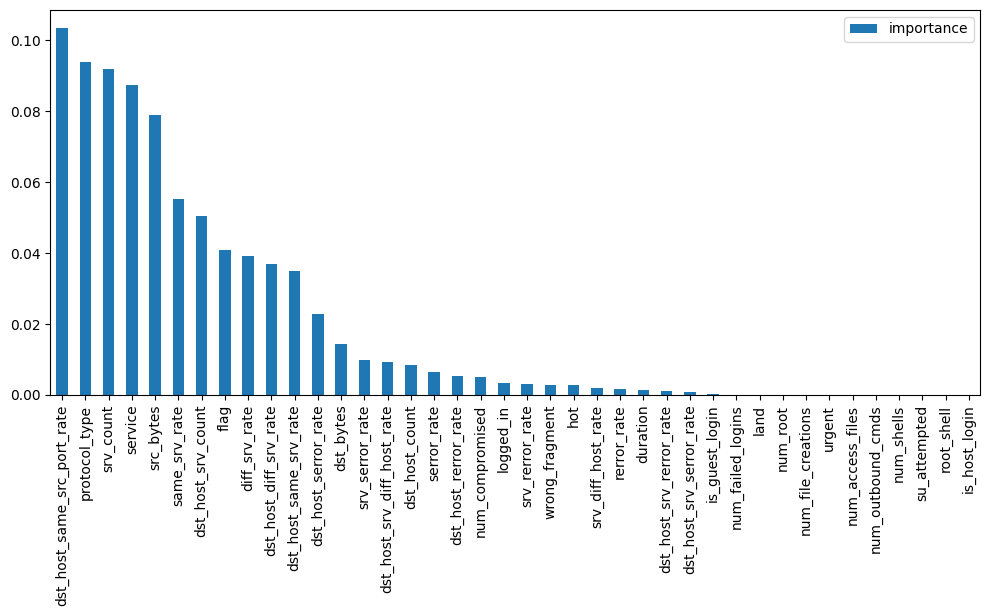

In [34]:
# Plot feature_importance in a bar graph:
plt.rcParams["figure.figsize"] = (12, 5)

updated_feature_importance.plot.bar()

If the bar graph shows 'connection', ignore it as 'connection' is a target NOT a feature; and we are only interested in inspecting feature importance.

<br>


In [35]:
pred = rfc_model.predict(features_test)
matrix_rfc = confusion_matrix(labels_test, pred)

print("Model:", rfc_model)

print("\n" + "Confusion Matrix for RandomForestClassifier:" + "\n")
print(matrix_rfc)
print('-' * 77)

print("Classification Report for RandomForestClassifier:" + "\n")
print(classification_report(labels_test, pred))

Model: RandomForestClassifier()

Confusion Matrix for RandomForestClassifier:

[[  29    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0]
 [   0    0    2    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0   19    0    0    0    0    0    0    0    1    0    0
     0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0 1678    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    2    0    0    0    2    0    0    0    0    0    0
     0    0]
 [   0    0    0    1    0    0    0    0 1444    0    0    0    0    0
     0    1]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    2    0    1    0    0    0

<br>

Feature importance using RFE (Recursive Feature Elimination). For more information, visit [sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)


In [36]:
import itertools
from sklearn.feature_selection import RFE


# Select top-15 features using RFE model:
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(features_train, labels_train)

print(rfe.get_support())

[False  True  True  True  True  True False False False False False False
  True False False False False False False False False False  True  True
 False False False False  True  True False  True  True  True  True  True
 False False False False False]


In [37]:
# Listing the selected top-k features:
feature_map = [(i, v) for i, v in itertools.zip_longest(
    rfe.get_support(), features_train.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'num_compromised',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate']

RFE is used to select top-k best features. You may like to use it as feature selection for building different classifiers.

End of the Workshop.

---

<br>
<br>

## **<center><u>Assessment: Experimentations (using Machine Learning)</u></center>**


In [38]:
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (GRU, Dense, Conv1D, Flatten, MaxPooling1D)

from matplotlib import style

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
)

In [39]:
my_df = pd.read_csv("KDDCup Data 10 Percent (Edited).csv")

print("Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
# The "Column - Unnamed: 0" is not required in the dataset, it is a copy of the index column.
my_df

Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,0,tcp,http,SF,181,5450,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,1,0,tcp,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,2,0,tcp,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,3,0,tcp,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,4,0,tcp,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,494016,0,tcp,http,SF,310,1881,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,494017,0,tcp,http,SF,282,2286,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,494018,0,tcp,http,SF,203,1200,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,494019,0,tcp,http,SF,291,1200,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [40]:
# So the "Column - Unnamed: 0" is dropped in this line of code:
drop_feature = my_df.drop(columns="Unnamed: 0", axis=1, inplace=True)

print("Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
my_df

Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [41]:
print("Below are the lists of columns from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
print('-' * 93)

for i, column in enumerate(my_df.columns):
    print("|Column {num:02}|: {column}".format(num=(i + 1), column=column))

Below are the lists of columns from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':
---------------------------------------------------------------------------------------------
|Column 01|: duration
|Column 02|: protocol_type
|Column 03|: service
|Column 04|: flag
|Column 05|: src_bytes
|Column 06|: dst_bytes
|Column 07|: land
|Column 08|: wrong_fragment
|Column 09|: urgent
|Column 10|: hot
|Column 11|: num_failed_logins
|Column 12|: logged_in
|Column 13|: num_compromised
|Column 14|: root_shell
|Column 15|: su_attempted
|Column 16|: num_root
|Column 17|: num_file_creations
|Column 18|: num_shells
|Column 19|: num_access_files
|Column 20|: num_outbound_cmds
|Column 21|: is_host_login
|Column 22|: is_guest_login
|Column 23|: count
|Column 24|: srv_count
|Column 25|: serror_rate
|Column 26|: srv_serror_rate
|Column 27|: rerror_rate
|Column 28|: srv_rerror_rate
|Column 29|: same_srv_rate
|Column 30|: diff_srv_rate
|Column 31|: srv_diff_host_rate
|Column 32|: dst_host_count
|Column 3

In [42]:
print("The information below, displays the unique counts for each type of connection:")
print('-' * 83)
my_df.connection.value_counts()

The information below, displays the unique counts for each type of connection:
-----------------------------------------------------------------------------------


connection
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

<br>

In the cell below, I am creating a personal/unique dataset from 5 unique types of `connection` in the **'Dataset - KDDCup Data 10 Percent (Edited).csv'**:

- smurf.
- neptune.
- satan.


In [43]:
my_features = my_df[
    (my_df.connection == "smurf.") | (my_df.connection ==
                                      "neptune.") | (my_df.connection == "satan.")
]

print("Features from my personalised data in the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
my_features

Features from my personalised data in the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
7601,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,tcp,telnet,S0,0,0,0,0,0,0,...,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf.
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf.
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490860,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.
490861,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.
490862,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.
490863,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.


In [44]:
my_features_rows = my_features.shape[0]
my_features_columns = my_features.shape[1]
my_df_rows = my_df.shape[0]
my_df_columns = my_df.shape[1]

print(f"From my personalised dataset, in the 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice \
that the data contains" + "\n" + f"{my_features_rows:,} rows and {my_features_columns} columns. Whereas from \
the original 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice that the " + "\n" +
      f"data contains {my_df_rows:,} rows and {my_df_columns} columns.")

From my personalised dataset, in the 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice that the data contains
389,580 rows and 42 columns. Whereas from the original 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice that the 
data contains 494,021 rows and 42 columns.


In [45]:
# Created dataset in random...
feature_rows = np.random.choice(my_features.index.values, 24861)
df = my_features.loc[feature_rows]

# Saved dataset, used for the project.
df.to_csv("ChrisNkemIke_24861.csv", index=False)

In [46]:
df = pd.read_csv("ChrisNkemIke_24861.csv")

print("Features in my personalised 'Dataset - ChrisNkemIke_24861.csv':")
df

Features in my personalised 'Dataset - ChrisNkemIke_24861.csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,klogin,S0,0,0,0,0,0,0,...,18,0.07,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
2,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24856,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24857,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
24858,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24859,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [47]:
print("The information below, displays the unique counts of each type of connections, from my " + "\n" +
      "personlised 'Dataset: Neptune Connection':")
print('-' * 91)
df.connection.value_counts()

The information below, displays the unique counts of each type of connections, from my 
personlised 'Dataset: Neptune Connection':
-------------------------------------------------------------------------------------------


connection
smurf.      17875
neptune.     6882
satan.        104
Name: count, dtype: int64

<br>

## Data Pre-Processing


In [48]:
print("Lists of Data Types from my personalised 'Dataset - ChrisNkemIke_24861.csv':")
df.dtypes

Lists of Data Types from my personalised 'Dataset - ChrisNkemIke_24861.csv':


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [49]:
print(
    f"My personalised dataset has {df.shape[0]:,} rows and {df.shape[1]} columns.")

My personalised dataset has 24,861 rows and 42 columns.


This is because there are duplicate elements, which will be removed from the cell below. But firstly, I will check for any `null` values, and treat them.

<br>


In [50]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [51]:
df.drop_duplicates(inplace=True)
print(
    f"My personalised dataset now has {df.shape[0]:,} rows and {df.shape[1]} columns.")

My personalised dataset now has 6,070 rows and 42 columns.


In [52]:
print("The current descriptive statistics, from my personalised 'Dataset - ChrisNkemIke_24861.csv':")
df.describe().T

The current descriptive statistics, from my personalised 'Dataset - ChrisNkemIke_24861.csv':


,count,mean,std,min,25%,50%,75%,max
duration,6070.0,0.000988,0.065445,0.0,0.00,0.00,0.00,5.00
src_bytes,6070.0,16.894728,116.016632,0.0,0.00,0.00,0.00,1032.00
dst_bytes,6070.0,0.005272,0.410729,0.0,0.00,0.00,0.00,32.00
land,6070.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
wrong_fragment,6070.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
urgent,6070.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
hot,6070.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
num_failed_logins,6070.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
logged_in,6070.0,0.000165,0.012835,0.0,0.00,0.00,0.00,1.00
num_compromised,6070.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6070 entries, 0 to 24852
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     6070 non-null   int64  
 1   protocol_type                6070 non-null   object 
 2   service                      6070 non-null   object 
 3   flag                         6070 non-null   object 
 4   src_bytes                    6070 non-null   int64  
 5   dst_bytes                    6070 non-null   int64  
 6   land                         6070 non-null   int64  
 7   wrong_fragment               6070 non-null   int64  
 8   urgent                       6070 non-null   int64  
 9   hot                          6070 non-null   int64  
 10  num_failed_logins            6070 non-null   int64  
 11  logged_in                    6070 non-null   int64  
 12  num_compromised              6070 non-null   int64  
 13  root_shell            

In [54]:
print("Below are the lists of columns from my personalised dataset:")
print('-' * 63)

for i, column in enumerate(df.columns):
    print("|Column {num:02}|: {column}".format(num=(i + 1), column=column))

Below are the lists of columns from my personalised dataset:
---------------------------------------------------------------
|Column 01|: duration
|Column 02|: protocol_type
|Column 03|: service
|Column 04|: flag
|Column 05|: src_bytes
|Column 06|: dst_bytes
|Column 07|: land
|Column 08|: wrong_fragment
|Column 09|: urgent
|Column 10|: hot
|Column 11|: num_failed_logins
|Column 12|: logged_in
|Column 13|: num_compromised
|Column 14|: root_shell
|Column 15|: su_attempted
|Column 16|: num_root
|Column 17|: num_file_creations
|Column 18|: num_shells
|Column 19|: num_access_files
|Column 20|: num_outbound_cmds
|Column 21|: is_host_login
|Column 22|: is_guest_login
|Column 23|: count
|Column 24|: srv_count
|Column 25|: serror_rate
|Column 26|: srv_serror_rate
|Column 27|: rerror_rate
|Column 28|: srv_rerror_rate
|Column 29|: same_srv_rate
|Column 30|: diff_srv_rate
|Column 31|: srv_diff_host_rate
|Column 32|: dst_host_count
|Column 33|: dst_host_srv_count
|Column 34|: dst_host_same_srv_rate

In [55]:
categorical_columns = df.select_dtypes(include=["object"]).columns

print("Below are the lists of categorical columns from my personalised dataset:")
print('-' * 73)

for i, column in enumerate(categorical_columns):
    print("|{num:02}|: {each_column}".format(num=(i + 1), each_column=column))

Below are the lists of categorical columns from my personalised dataset:
-------------------------------------------------------------------------
|01|: protocol_type
|02|: service
|03|: flag
|04|: connection


In [56]:
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [57]:
drop_column = df.columns
drop_connection_column = drop_column[:-1]

print("Below are the lists of columns from my personalised dataset, with the 'Column - connection' dropped:")
print('-' * 103)

for i, column in enumerate(drop_connection_column):
    print("|{num:02}|: {each_column}".format(num=(i + 1), each_column=column))

Below are the lists of columns from my personalised dataset, with the 'Column - connection' dropped:
-------------------------------------------------------------------------------------------------------
|01|: duration
|02|: protocol_type
|03|: service
|04|: flag
|05|: src_bytes
|06|: dst_bytes
|07|: land
|08|: wrong_fragment
|09|: urgent
|10|: hot
|11|: num_failed_logins
|12|: logged_in
|13|: num_compromised
|14|: root_shell
|15|: su_attempted
|16|: num_root
|17|: num_file_creations
|18|: num_shells
|19|: num_access_files
|20|: num_outbound_cmds
|21|: is_host_login
|22|: is_guest_login
|23|: count
|24|: srv_count
|25|: serror_rate
|26|: srv_serror_rate
|27|: rerror_rate
|28|: srv_rerror_rate
|29|: same_srv_rate
|30|: diff_srv_rate
|31|: srv_diff_host_rate
|32|: dst_host_count
|33|: dst_host_srv_count
|34|: dst_host_same_srv_rate
|35|: dst_host_diff_srv_rate
|36|: dst_host_same_src_port_rate
|37|: dst_host_srv_diff_host_rate
|38|: dst_host_serror_rate
|39|: dst_host_srv_serror_rate
|4

In [58]:
applied_standard_scaler = standard_scaler.fit_transform(
    df[drop_connection_column])

print(applied_standard_scaler)

[[-0.01510497 -6.13999687 -4.12502363 ... -1.85022433 -0.50290625
  -0.49922764]
 [-0.01510497  0.13120976 -2.32514271 ...  0.54098438 -0.50290625
  -0.49922764]
 [-0.01510497  0.13120976  0.22468859 ...  0.54098438 -0.50290625
  -0.49922764]
 ...
 [-0.01510497  0.13120976  0.22468859 ...  0.54098438 -0.50290625
  -0.49922764]
 [-0.01510497  0.13120976 -5.02496409 ...  0.54098438 -0.50290625
  -0.49922764]
 [-0.01510497  0.13120976  0.22468859 ...  0.54098438 -0.50290625
  -0.49922764]]


In [59]:
transformed_df = pd.DataFrame(
    applied_standard_scaler, columns=drop_connection_column)
full_df = pd.DataFrame(transformed_df)
full_df["connection"] = df.connection

print("Features from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:")
full_df

Features from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,-0.015105,-6.139997,-4.125024,1.665048,4.336850,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,2.0
1,-0.015105,0.131210,-2.325143,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.046613,0.037761,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
2,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.091677,-0.100776,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
3,-0.015105,-6.139997,-4.125024,1.665048,8.750374,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,2.0
4,-0.015105,-6.139997,-4.125024,1.665048,8.750374,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6065,-0.015105,0.131210,0.224689,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.312941,-0.308582,0.032765,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094,NaN
6066,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.202309,-0.170045,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,NaN
6067,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.368257,-0.377851,0.129594,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,NaN
6068,-0.015105,0.131210,-5.024964,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.202309,-0.170045,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,NaN


Notice that in the `Column - connection`, there are `NaN` values, and they need to be treated, because the `Column - connection` is what I will use as the target, in my personalised dataset. So what I have chosen to do, is to fill the `NaN` values in the `Column - connection`, by the column's average values.

<br>


In [60]:
full_df["connection"].fillna(0, inplace=True)
# full_df.apply(lambda missing_values: sum(missing_values.isna()), axis=0)

print("First 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:")
full_df[:10]

First 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,-0.015105,-6.139997,-4.125024,1.665048,4.336850,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,2.0
1,-0.015105,0.131210,-2.325143,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.046613,0.037761,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
2,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.091677,-0.100776,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
3,-0.015105,-6.139997,-4.125024,1.665048,8.750374,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,2.0
4,-0.015105,-6.139997,-4.125024,1.665048,8.750374,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,0.0
5,-0.015105,-6.139997,-4.125024,1.665048,8.750374,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,0.0
6,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.018955,0.037761,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,2.0
7,-0.015105,-6.139997,-4.125024,1.665048,4.336850,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,2.0
8,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.312941,-0.308582,0.032765,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
9,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.129587,0.107030,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0


In [61]:
print("Last 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:")
full_df[-10:]

Last 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
6060,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.074271,0.037761,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
6061,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.240219,0.245567,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,2.0
6062,-0.015105,0.131210,0.224689,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.368257,-0.377851,-0.064063,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094,0.0
6063,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.312941,-0.308582,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
6064,-0.015105,-6.139997,-4.125024,1.665048,8.750374,-0.012836,0.0,0.0,0.0,0.0,...,6.601562,6.479748,-0.741866,6.438710,-0.02594,-1.855723,-1.850224,-0.502906,-0.499228,0.0
6065,-0.015105,0.131210,0.224689,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.312941,-0.308582,0.032765,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094,0.0
6066,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.202309,-0.170045,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
6067,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.368257,-0.377851,0.129594,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
6068,-0.015105,0.131210,-5.024964,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.202309,-0.170045,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0
6069,-0.015105,0.131210,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,-0.202309,-0.170045,-0.160892,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228,0.0


In [62]:
full_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<br>

## Data Analytics


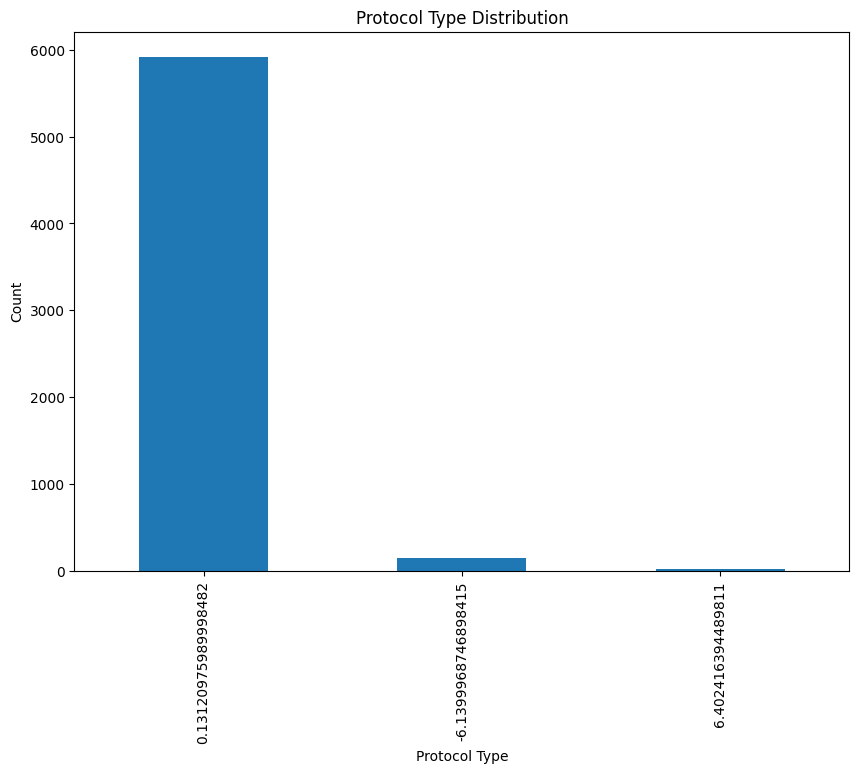

In [63]:
plt.rcParams["figure.figsize"] = (10, 7)

full_df["protocol_type"].value_counts().plot(kind="bar")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.title("Protocol Type Distribution")
plt.show()

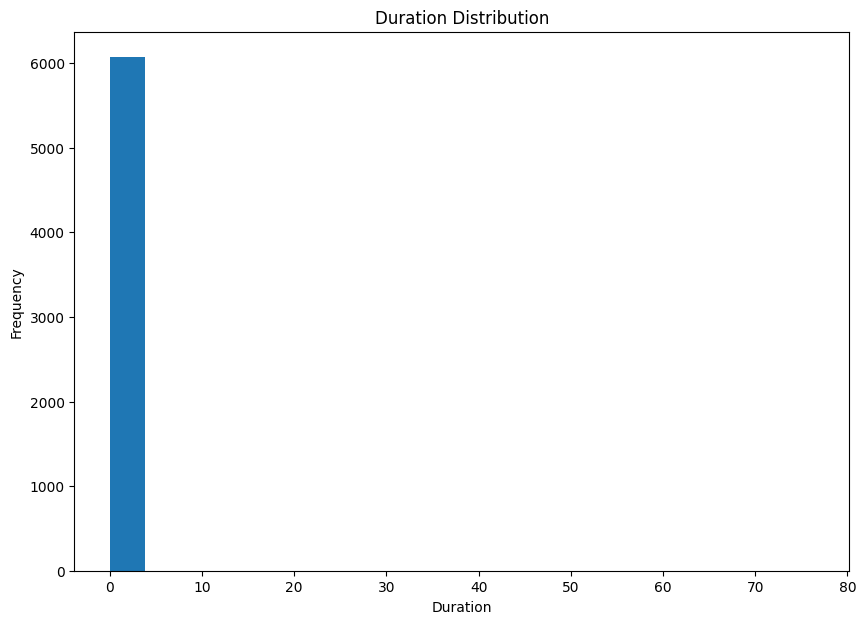

In [64]:
full_df["duration"].plot(kind="hist", bins=20)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Duration Distribution")
plt.show()

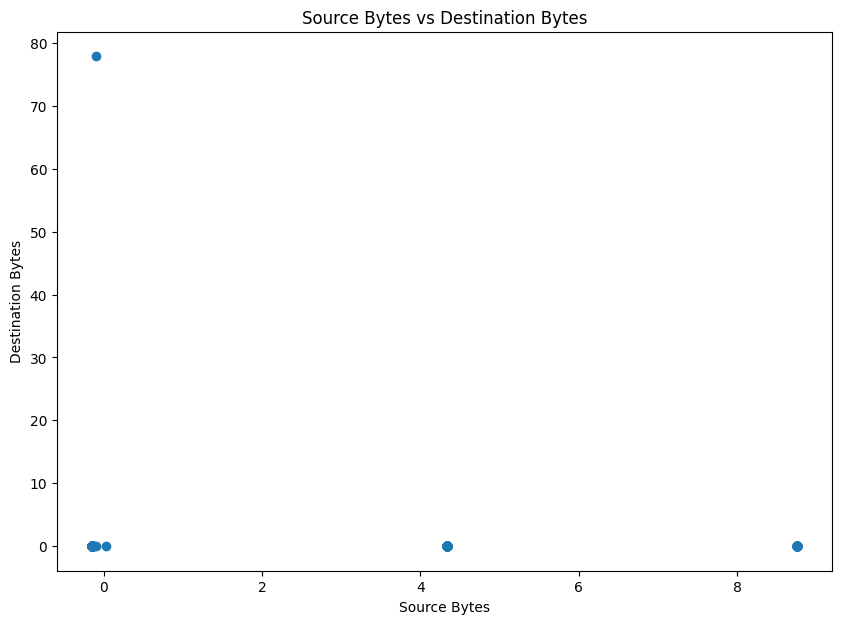

In [65]:
plt.scatter(full_df["src_bytes"], full_df["dst_bytes"])
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.title("Source Bytes vs Destination Bytes")
plt.show()

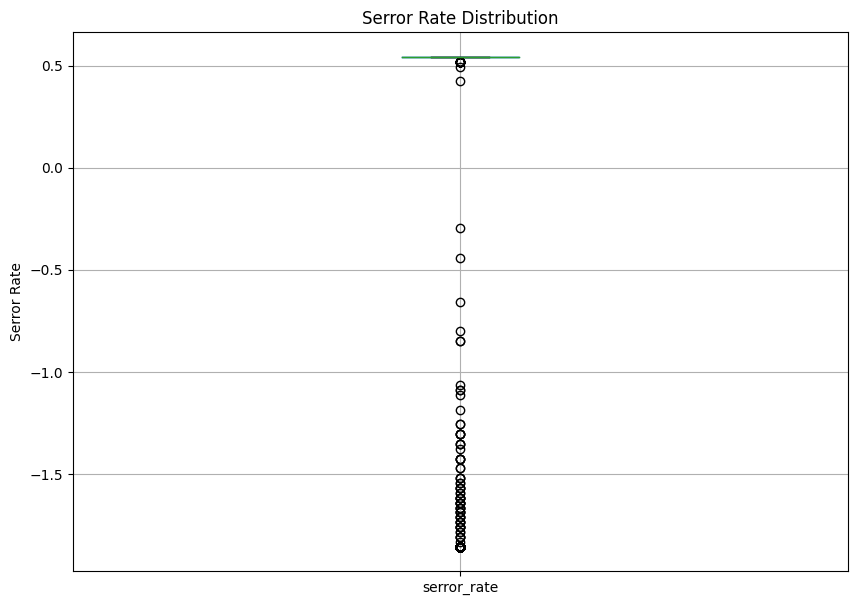

In [66]:
full_df.boxplot(column="serror_rate")
plt.ylabel("Serror Rate")
plt.title("Serror Rate Distribution")
plt.show()

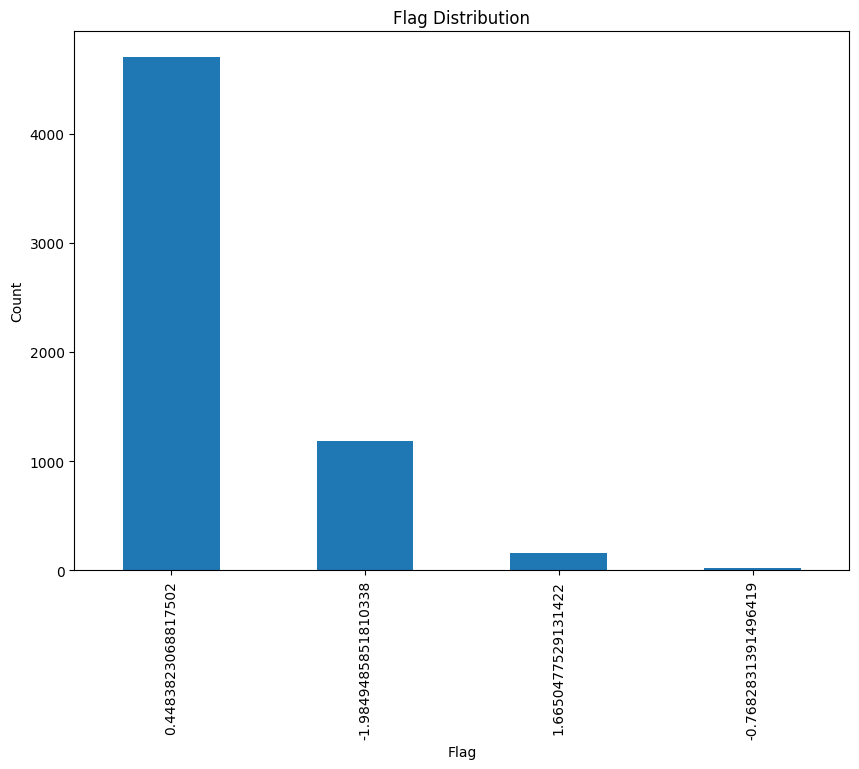

In [67]:
full_df["flag"].value_counts().plot(kind="bar")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.title("Flag Distribution")
plt.show()

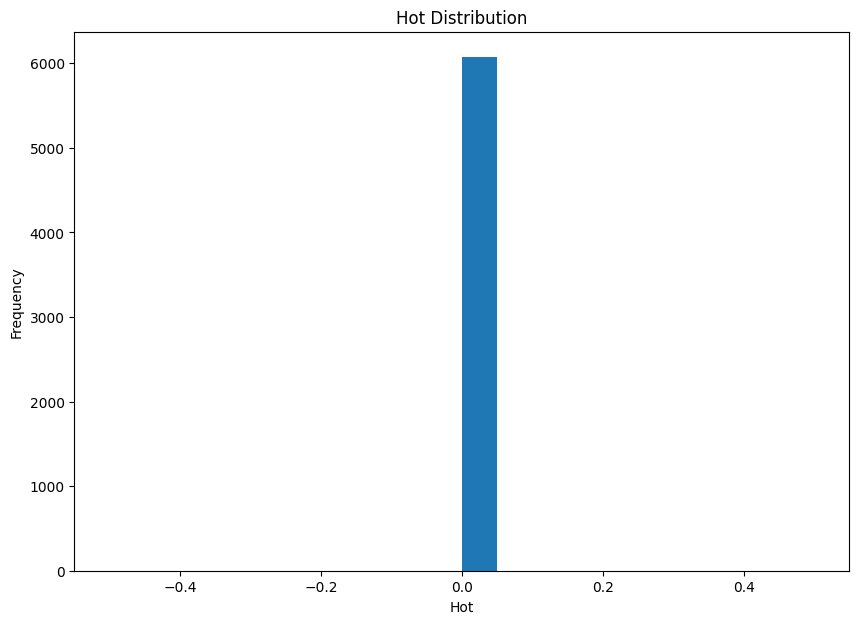

In [68]:
full_df["hot"].plot(kind="hist", bins=20)
plt.xlabel("Hot")
plt.ylabel("Frequency")
plt.title("Hot Distribution")
plt.show()

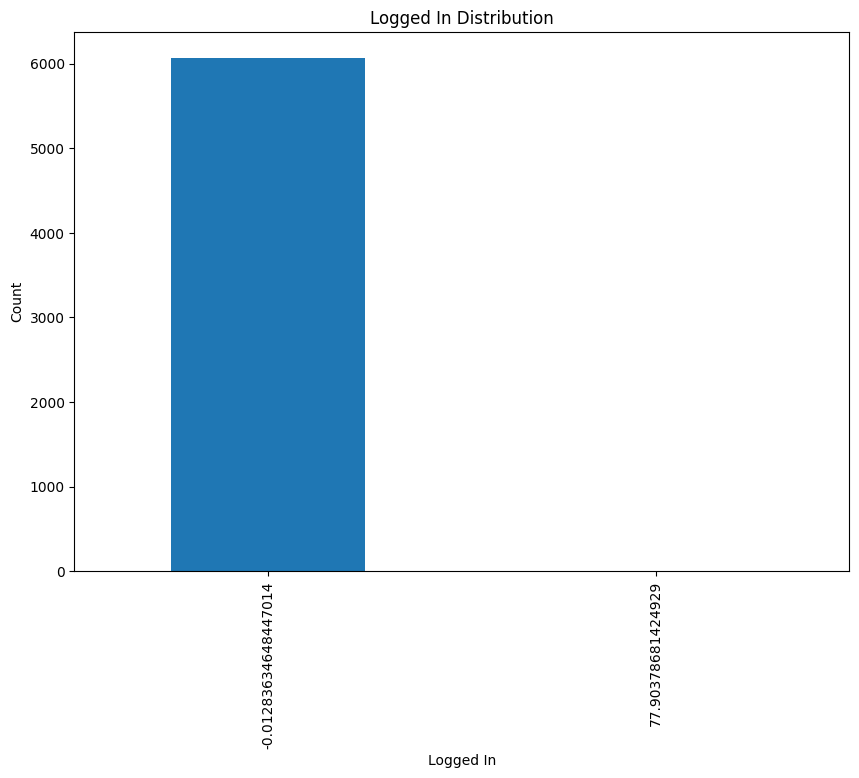

In [69]:
full_df["logged_in"].value_counts().plot(kind="bar")
plt.xlabel("Logged In")
plt.ylabel("Count")
plt.title("Logged In Distribution")
plt.show()

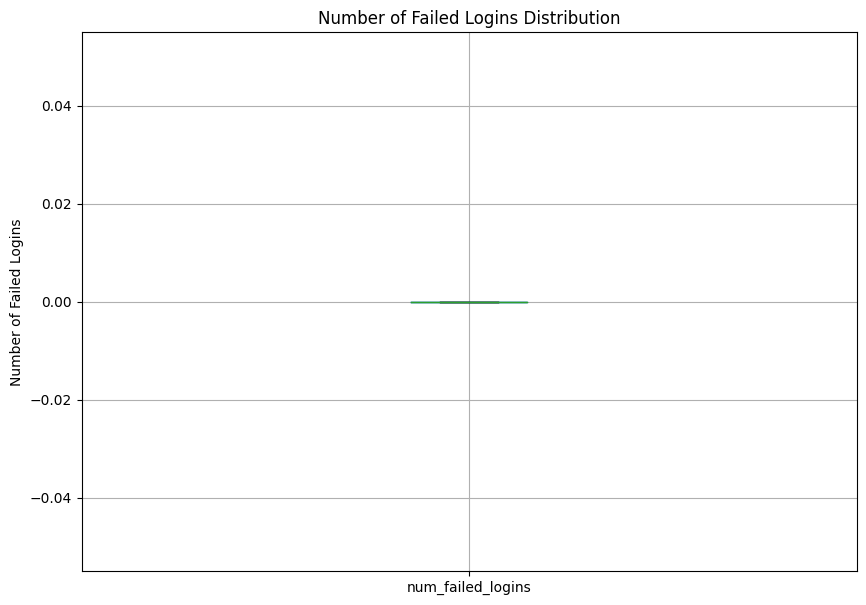

In [70]:
full_df.boxplot(column="num_failed_logins")
plt.ylabel("Number of Failed Logins")
plt.title("Number of Failed Logins Distribution")
plt.show()

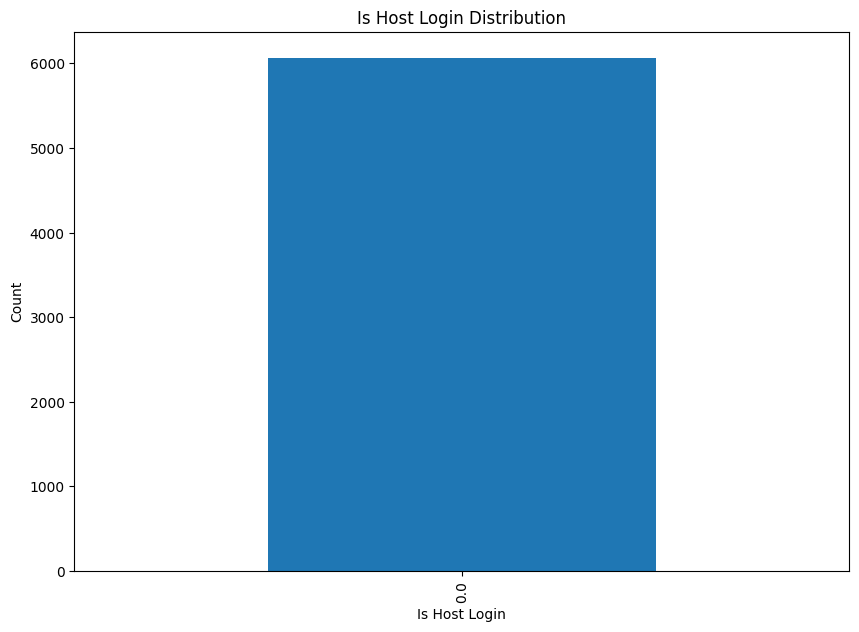

In [71]:
full_df["is_host_login"].value_counts().plot(kind="bar")
plt.xlabel("Is Host Login")
plt.ylabel("Count")
plt.title("Is Host Login Distribution")
plt.show()

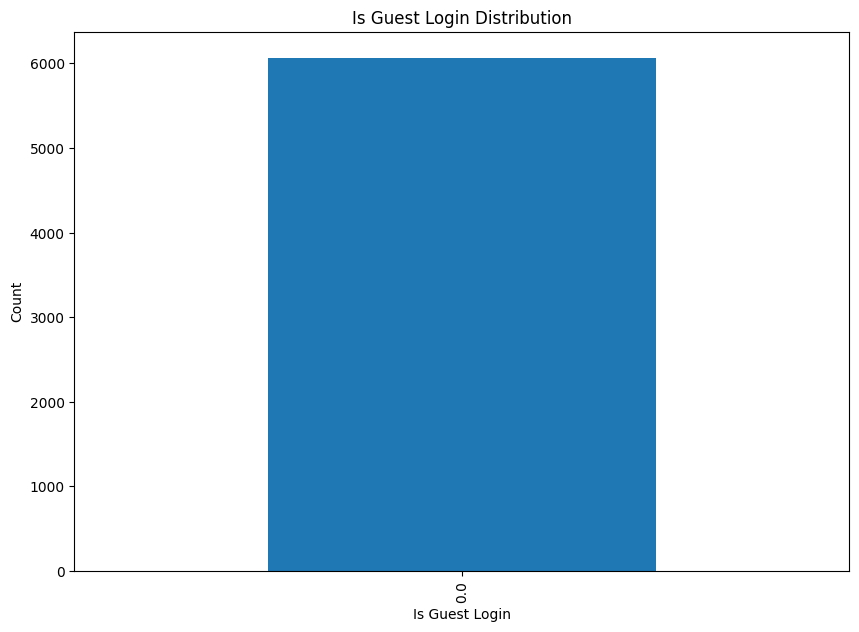

In [72]:
full_df["is_guest_login"].value_counts().plot(kind="bar")
plt.xlabel("Is Guest Login")
plt.ylabel("Count")
plt.title("Is Guest Login Distribution")
plt.show()

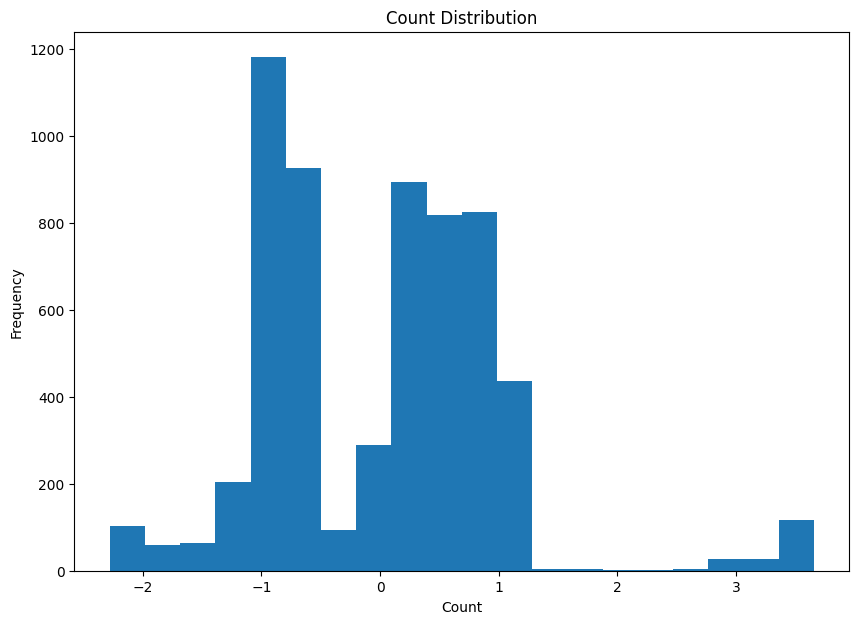

In [73]:
full_df["count"].plot(kind="hist", bins=20)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Count Distribution")
plt.show()

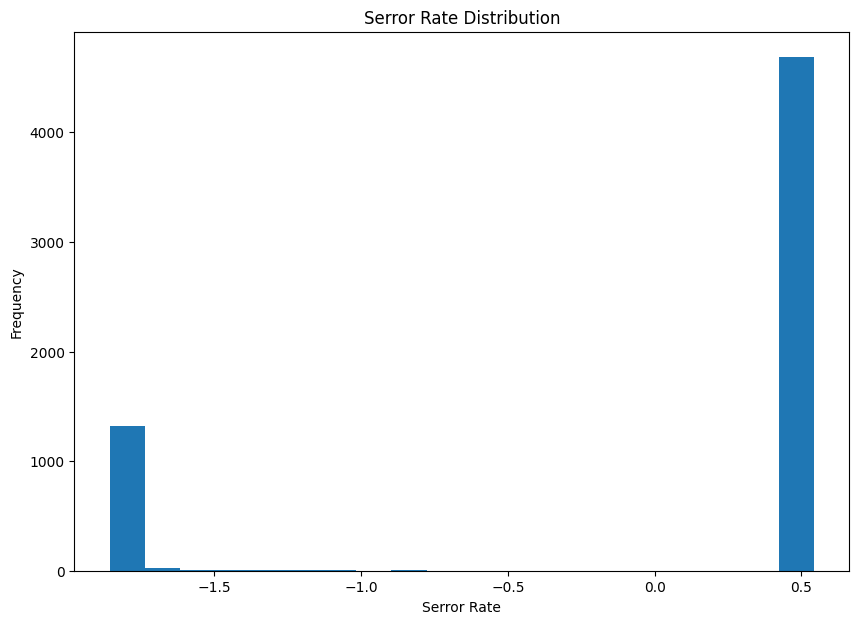

In [74]:
full_df["serror_rate"].plot(kind="hist", bins=20)
plt.xlabel("Serror Rate")
plt.ylabel("Frequency")
plt.title("Serror Rate Distribution")
plt.show()

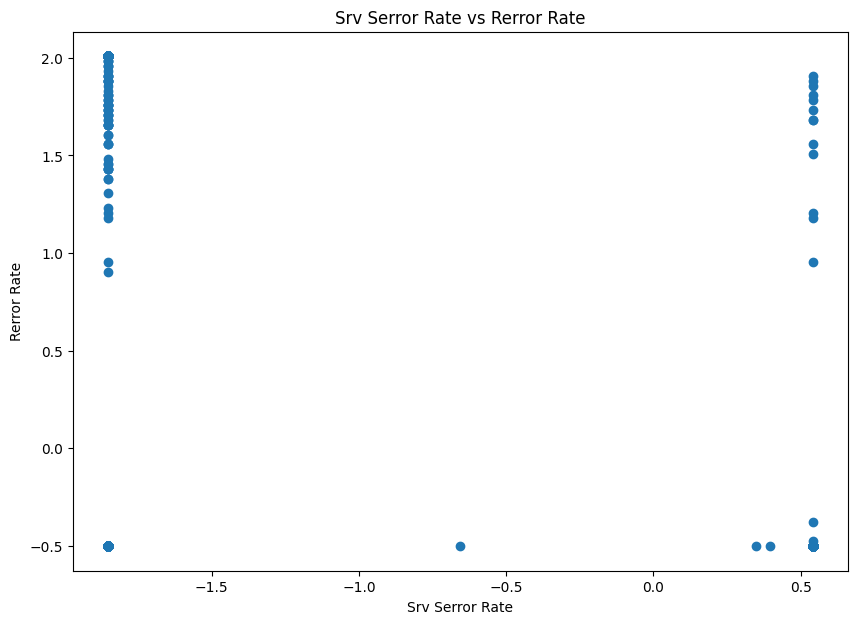

In [75]:
plt.scatter(full_df["srv_serror_rate"], full_df["rerror_rate"])
plt.xlabel("Srv Serror Rate")
plt.ylabel("Rerror Rate")
plt.title("Srv Serror Rate vs Rerror Rate")
plt.show()

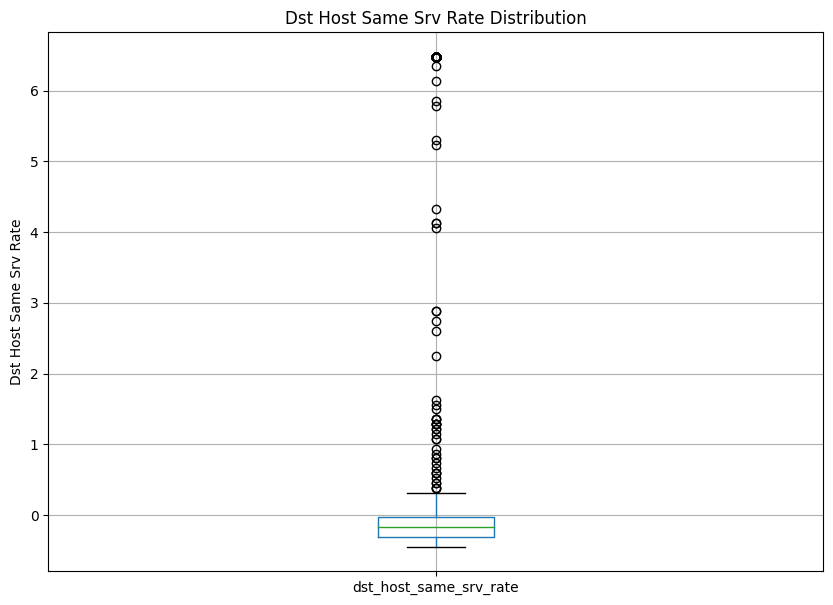

In [76]:
full_df.boxplot(column="dst_host_same_srv_rate")
plt.ylabel("Dst Host Same Srv Rate")
plt.title("Dst Host Same Srv Rate Distribution")
plt.show()

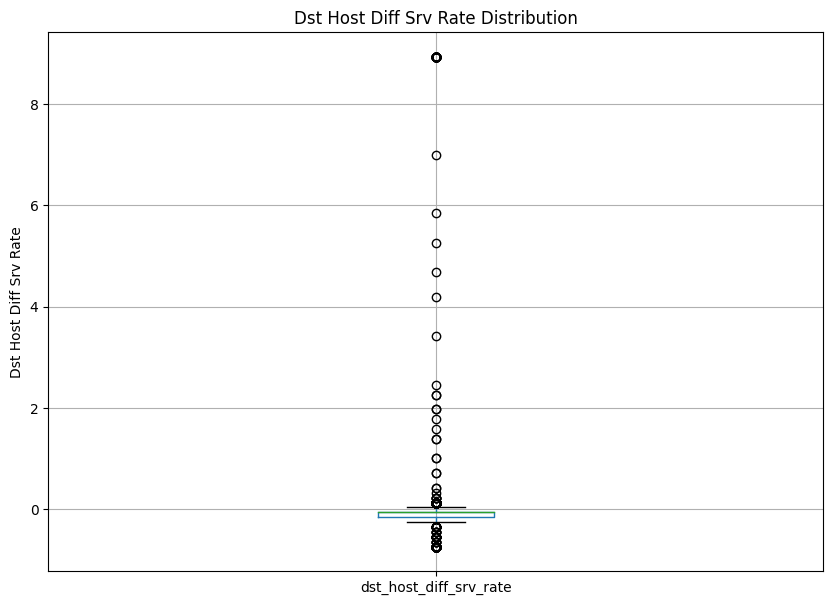

In [77]:
full_df.boxplot(column="dst_host_diff_srv_rate")
plt.ylabel("Dst Host Diff Srv Rate")
plt.title("Dst Host Diff Srv Rate Distribution")
plt.show()

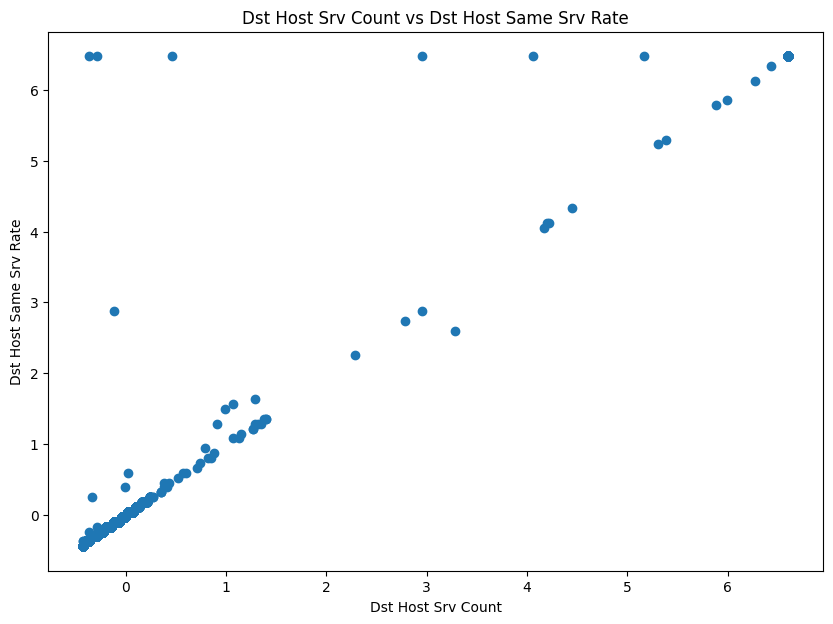

In [78]:
plt.scatter(full_df["dst_host_srv_count"], full_df["dst_host_same_srv_rate"])
plt.xlabel("Dst Host Srv Count")
plt.ylabel("Dst Host Same Srv Rate")
plt.title("Dst Host Srv Count vs Dst Host Same Srv Rate")
plt.show()

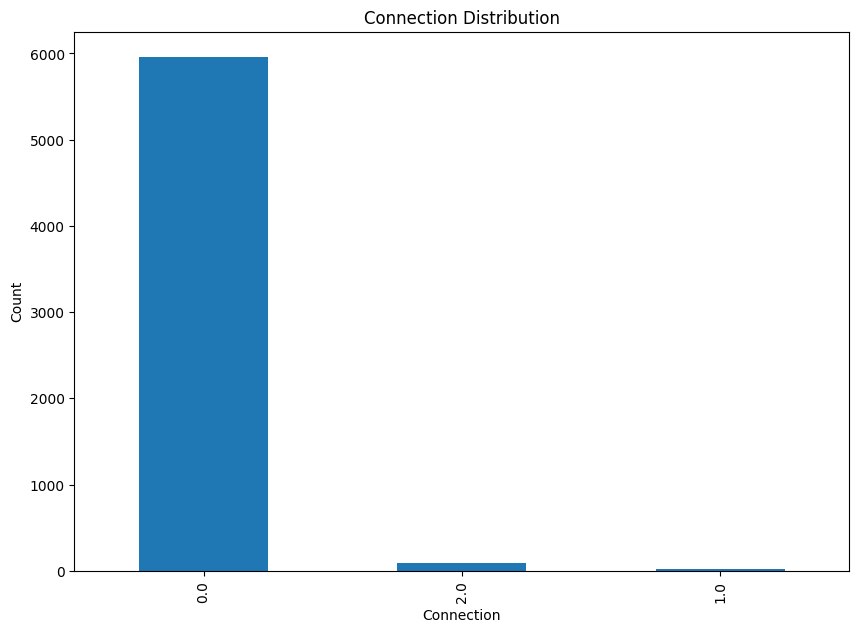

In [79]:
full_df["connection"].value_counts().plot(kind="bar")
plt.xlabel("Connection")
plt.ylabel("Count")
plt.title("Connection Distribution")
plt.show()

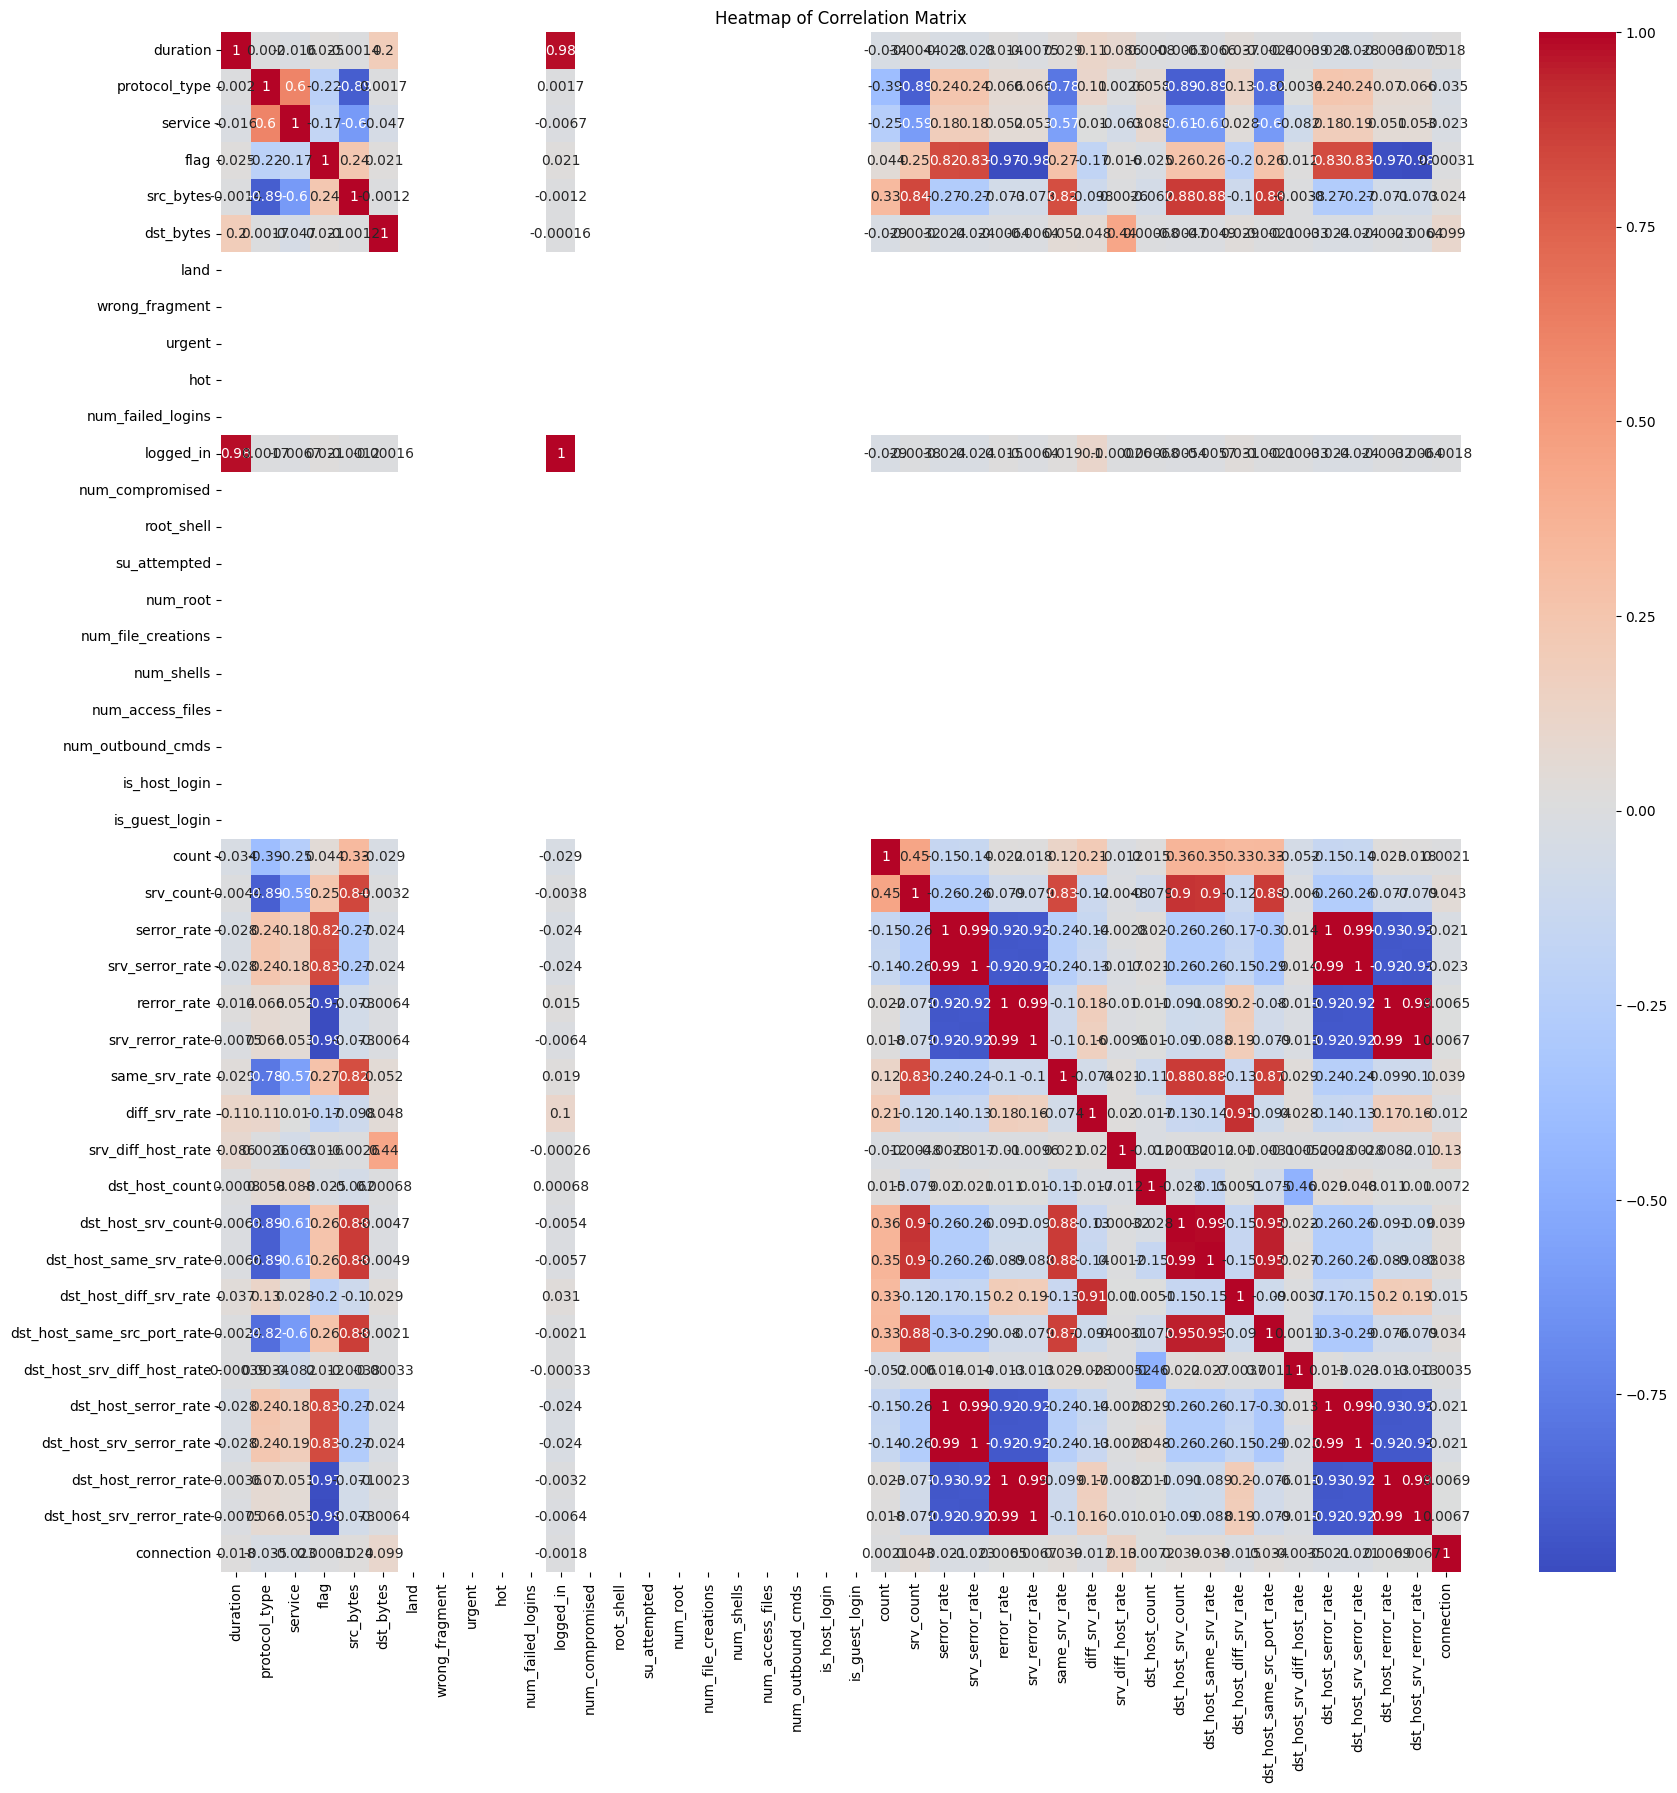

In [80]:
corr = full_df.corr()

plt.figure(figsize=(20, 20))
plt.title("Heatmap of Correlation Matrix")
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

<br>

## Training and Testing the Dataset


In [81]:
target = full_df.connection
X_train, X_test, y_train, y_test = train_test_split(
    transformed_df, target, test_size=0.3, random_state=4861)

print("Features of the target:")
target

Features of the target:


0       2.0
1       0.0
2       0.0
3       2.0
4       0.0
       ... 
6065    0.0
6066    0.0
6067    0.0
6068    0.0
6069    0.0
Name: connection, Length: 6070, dtype: float64

In [82]:
print("Features X_train:")
X_train

Features X_train:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
4150,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.368257,-0.377851,-0.160892,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
3896,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.036361,-0.031508,-0.160892,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
5056,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.368257,-0.377851,0.032765,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
4635,-0.015105,0.13121,0.224689,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.285283,-0.308582,0.032765,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094
4906,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.064019,-0.100776,0.129594,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,-0.015105,0.13121,0.224689,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.174651,-0.170045,-0.064063,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094
5104,-0.015105,0.13121,-2.475133,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.091677,-0.100776,-0.064063,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094
4553,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.423573,-0.447120,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
5454,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.174651,-0.170045,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228


In [83]:
print("Features X_test:")
X_test

Features X_test:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
606,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.119335,-0.100776,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
3205,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.036361,-0.031508,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
903,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.146993,-0.170045,0.032765,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
4322,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,0.018955,0.037761,-0.064063,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
5810,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,0.212561,0.176298,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,-0.015105,0.13121,0.224689,-1.984949,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,0.074271,0.037761,-0.160892,-0.160055,-0.02594,-1.855723,-1.850224,2.009473,2.003094
3298,-0.015105,0.13121,-1.575192,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,0.074271,0.037761,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
3717,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.423573,-0.447120,-0.257721,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228
1112,-0.015105,0.13121,0.224689,0.448382,-0.145635,-0.012836,0.0,0.0,0.0,0.0,...,0.05288,-0.312941,-0.308582,0.129594,-0.160055,-0.02594,0.543021,0.540984,-0.502906,-0.499228


In [84]:
print("Features y_train:")
y_train

Features y_train:


4150    0.0
3896    0.0
5056    0.0
4635    0.0
4906    0.0
       ... 
1621    0.0
5104    0.0
4553    0.0
5454    0.0
2101    0.0
Name: connection, Length: 4249, dtype: float64

In [85]:
print("Features y_test:")
y_test

Features y_test:


606     0.0
3205    0.0
903     0.0
4322    0.0
5810    0.0
       ... 
3788    0.0
3298    0.0
3717    0.0
1112    0.0
702     0.0
Name: connection, Length: 1821, dtype: float64

<br>

## **<center><u>Assessment: Experimentations (using Machine Learning)</u></center>**

### (1): XGBoost Classifier


In [86]:
print("Evaluation for: XGBoost Classifier".center(80, '_'))

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

xgb_prediction = xgb.predict(X_test)
xgb_accuracy_score = accuracy_score(y_test, xgb_prediction)
xgb_precision_score = precision_score(
    y_test, xgb_prediction, average="weighted")
xgb_recall_score = recall_score(y_test, xgb_prediction, average="weighted")
xgb_f1_score = f1_score(y_test, xgb_prediction, average="weighted")

print(f"Model Type: {xgb}")
print("\n" + f"Prediciton: {xgb_prediction}")
print('-' * 80)

print(f"Accuracy Score:  {(xgb_accuracy_score):%}")
print(f"Precision Score: {(xgb_precision_score):%}")
print(f"Recall Score:    {(xgb_recall_score):%}")
print(f"F1-Score:        {(xgb_f1_score):%}")

_______________________Evaluation for: XGBoost Classifier_______________________
Model Type: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Prediciton: [0 0 0 ... 0 0 0]
--------------------------------------------------------------------------------
Accuracy Score:  97.913234%
Precis

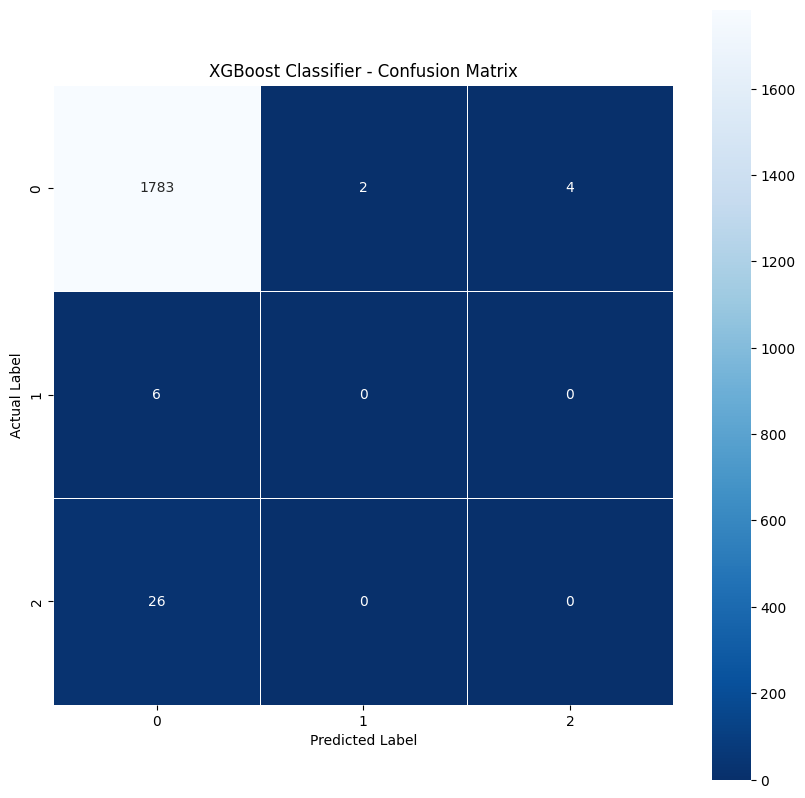

In [87]:
# Plotting the Confusion Matrix:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(xgb_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("XGBoost Classifier - Confusion Matrix")
plt.show()

In [88]:
print("Classification Report For XGBoost Classifier:")
print('-' * 57)
print(classification_report(y_test, xgb_prediction))

Classification Report For XGBoost Classifier:
---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



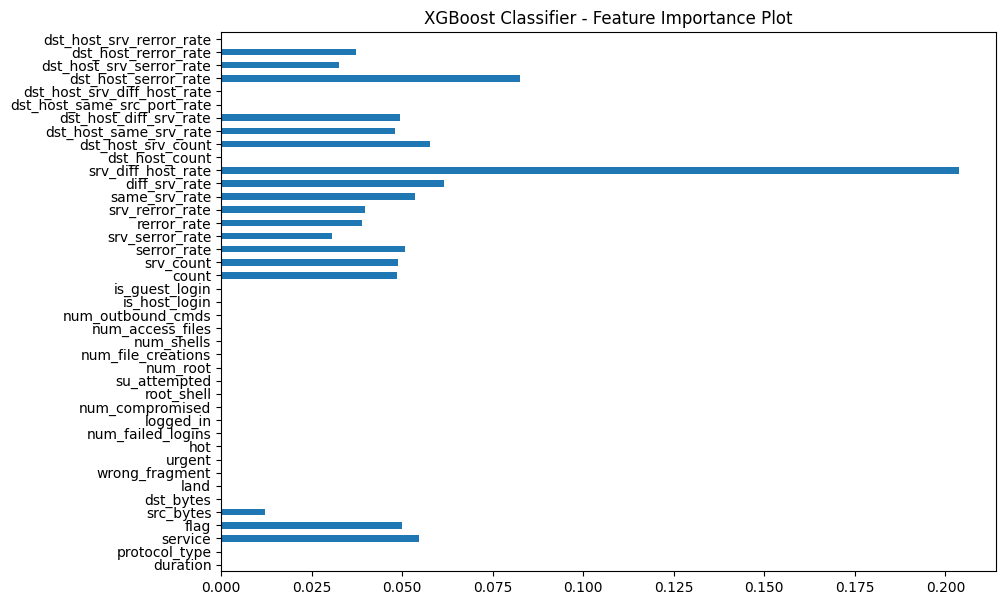

In [89]:
xgb_feature_importance = pd.Series(
    xgb.feature_importances_, index=transformed_df.columns)

plt.title("XGBoost Classifier - Feature Importance Plot")
xgb_feature_importance.plot(kind="barh")
plt.show()

<br>

### (2): AdaBoost Classifier


In [90]:
print("Evaluation for: AdaBoost Classifier".center(57, '_'))

abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

abc_prediction = abc.predict(X_test)
abc_accuracy_score = accuracy_score(y_test, abc_prediction)
abc_precision_score = precision_score(
    y_test, abc_prediction, average="weighted")
abc_recall_score = recall_score(y_test, abc_prediction, average="weighted")
abc_f1_score = f1_score(y_test, abc_prediction, average="weighted")

print(f"Model Type: {abc}")
print(f"Prediciton: {abc_prediction}")
print('-' * 57)

print(f"Accuracy Score:  {(abc_accuracy_score):%}")
print(f"Precision Score: {(abc_precision_score):%}")
print(f"Recall Score:    {(abc_recall_score):%}")
print(f"F1-Score:        {(abc_f1_score):%}")

___________Evaluation for: AdaBoost Classifier___________
Model Type: AdaBoostClassifier()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
---------------------------------------------------------
Accuracy Score:  98.187809%
Precision Score: 96.515379%
Recall Score:    98.187809%
F1-Score:        97.344411%


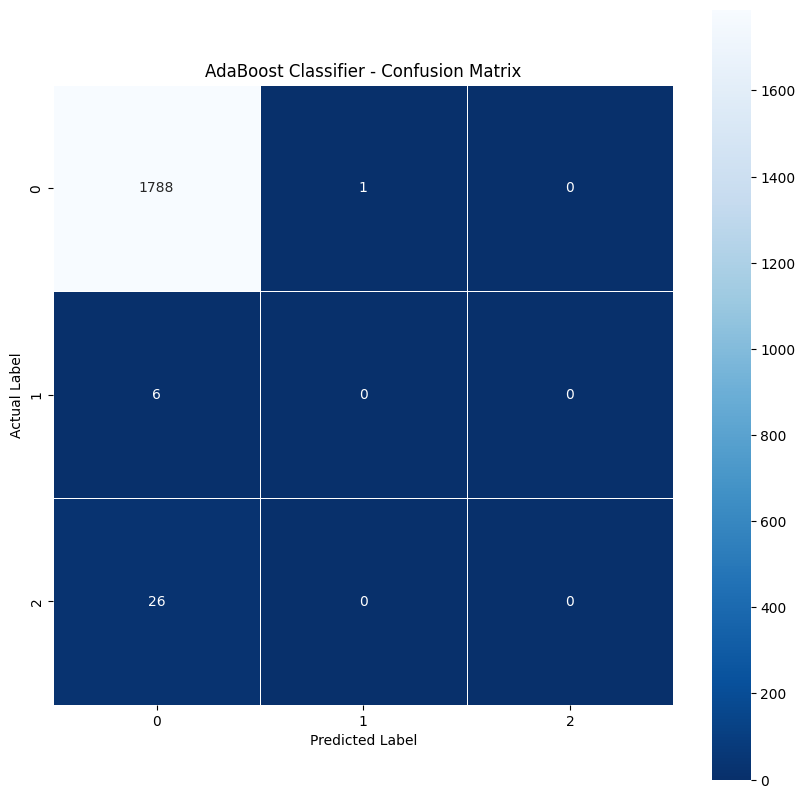

In [91]:
# Plotting the Confusion Matrix:
abc_confusion_matrix = confusion_matrix(y_test, abc_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(abc_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("AdaBoost Classifier - Confusion Matrix")
plt.show()

In [92]:
print("Classification Report For AdaBoost Classifier:")
print('-' * 57)
print(classification_report(y_test, abc_prediction))

Classification Report For AdaBoost Classifier:
---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



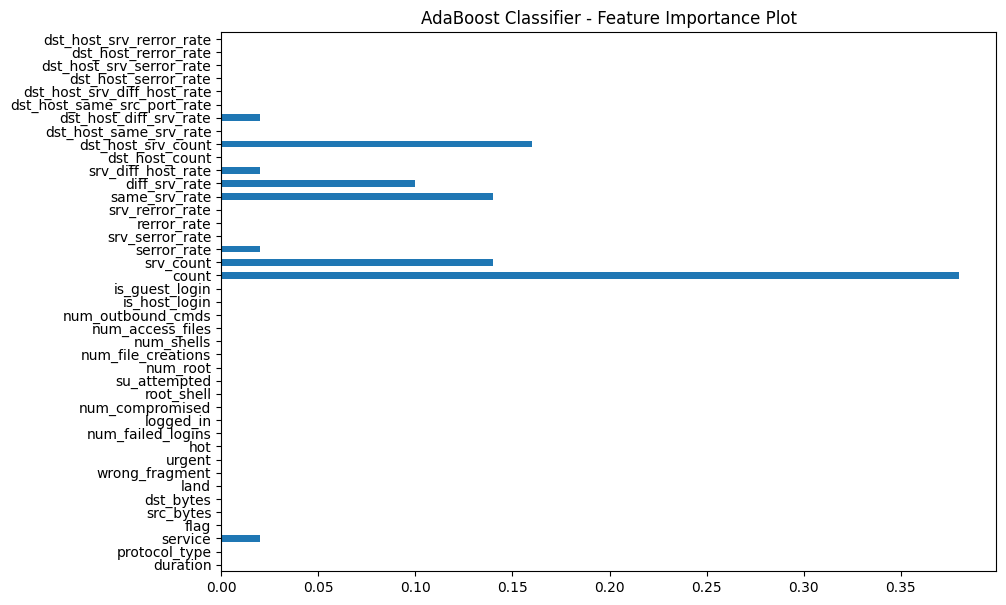

In [93]:
abc_feature_importance = pd.Series(
    abc.feature_importances_, index=transformed_df.columns)

plt.title("AdaBoost Classifier - Feature Importance Plot")
abc_feature_importance.plot(kind="barh")
plt.show()

<br>

### (3): K-Neighbors Classifier


In [94]:
print("Evaluation for: K-Neighbors Classifier".center(57, '_'))

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_prediction = knn.predict(X_test)
knn_accuracy_score = accuracy_score(y_test, knn_prediction)
knn_precision_score = precision_score(
    y_test, knn_prediction, average="weighted")
knn_recall_score = recall_score(y_test, knn_prediction, average="weighted")
knn_f1_score = f1_score(y_test, knn_prediction, average="weighted")

print(f"Model Type: {knn}")
print(f"Prediciton: {knn_prediction}")
print('-' * 57)

print(f"Accuracy Score:  {(knn_accuracy_score):%}")
print(f"Precision Score: {(knn_precision_score):%}")
print(f"Recall Score:    {(knn_recall_score):%}")
print(f"F1-Score:        {(knn_f1_score):%}")

__________Evaluation for: K-Neighbors Classifier_________
Model Type: KNeighborsClassifier()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
---------------------------------------------------------
Accuracy Score:  98.242724%
Precision Score: 96.516328%
Recall Score:    98.242724%
F1-Score:        97.371874%


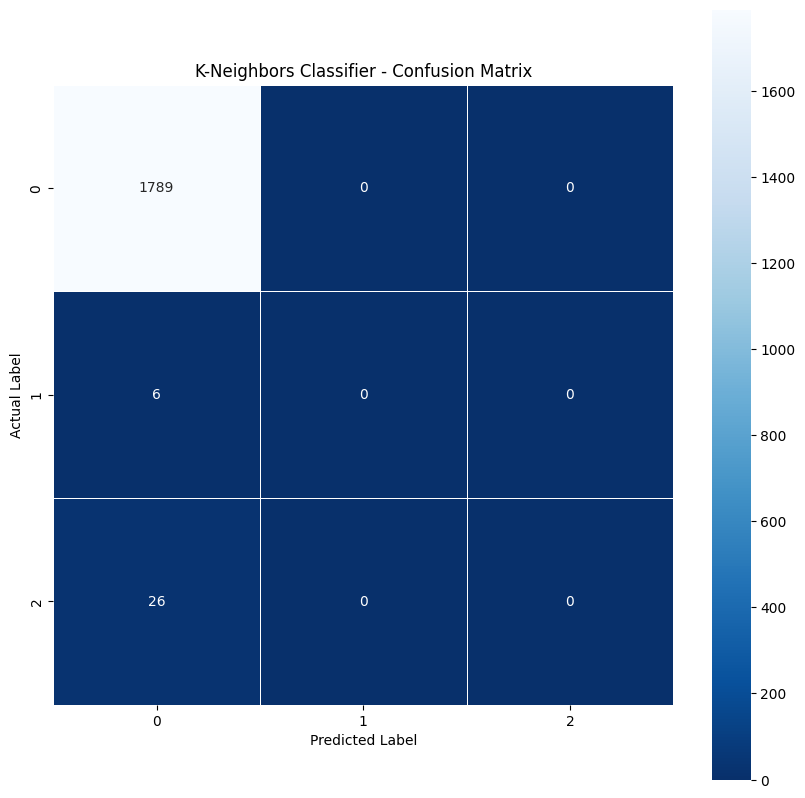

In [95]:
# Plotting the Confusion Matrix:
knn_confusion_matrix = confusion_matrix(y_test, knn_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(knn_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("K-Neighbors Classifier - Confusion Matrix")
plt.show()

In [96]:
print("Classification Report For K-Neighbors Classifier:")
print('-' * 57)
print(classification_report(y_test, knn_prediction))

Classification Report For K-Neighbors Classifier:
---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



<br>

### (4): Decision Tree Classifier


In [97]:
print("Evaluation for: Decision Tree Classifier".center(57, '_'))

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc_prediction = dtc.predict(X_test)
dtc_accuracy_score = accuracy_score(y_test, dtc_prediction)
dtc_precision_score = precision_score(
    y_test, dtc_prediction, average="weighted")
dtc_recall_score = recall_score(y_test, dtc_prediction, average="weighted")
dtc_f1_score = f1_score(y_test, dtc_prediction, average="weighted")

print(f"Model Type: {dtc}")
print(f"Prediciton: {dtc_prediction}")
print('-' * 57)

print(f"Accuracy Score:  {(dtc_accuracy_score):%}")
print(f"Precision Score: {(dtc_precision_score):%}")
print(f"Recall Score:    {(dtc_recall_score):%}")
print(f"F1-Score:        {(dtc_f1_score):%}")

_________Evaluation for: Decision Tree Classifier________
Model Type: DecisionTreeClassifier()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
---------------------------------------------------------
Accuracy Score:  95.936299%
Precision Score: 96.475570%
Recall Score:    95.936299%
F1-Score:        96.205178%


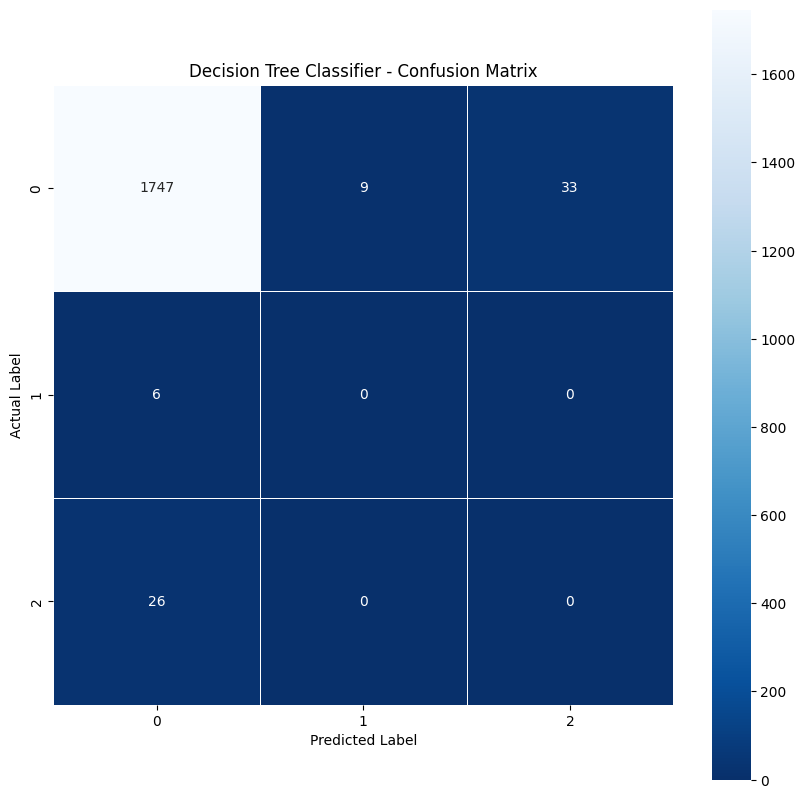

In [98]:
# Plotting the Confusion Matrix:
dtc_confusion_matrix = confusion_matrix(y_test, dtc_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(dtc_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Decision Tree Classifier - Confusion Matrix")
plt.show()

In [99]:
print("Classification Report For Decision Tree Classifier:")
print('-' * 57)
print(classification_report(y_test, dtc_prediction))

Classification Report For Decision Tree Classifier:
---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.96      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.96      0.96      0.96      1821



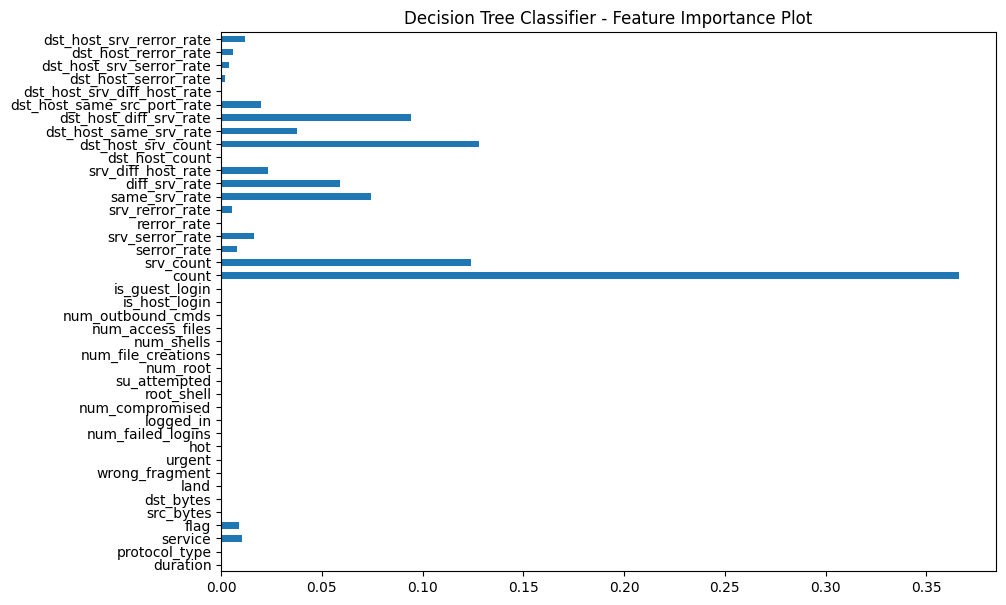

In [100]:
dtc_feature_importance = pd.Series(
    dtc.feature_importances_, index=transformed_df.columns)

plt.title("Decision Tree Classifier - Feature Importance Plot")
dtc_feature_importance.plot(kind="barh")
plt.show()

<br>

### (5): Random Forest Classifier


In [101]:
print("Evaluation for: Random Forest Classifier".center(57, '_'))

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc_prediction = rfc.predict(X_test)
rfc_accuracy_score = accuracy_score(y_test, rfc_prediction)
rfc_precision_score = precision_score(
    y_test, rfc_prediction, average="weighted")
rfc_recall_score = recall_score(y_test, rfc_prediction, average="weighted")
rfc_f1_score = f1_score(y_test, rfc_prediction, average="weighted")

print(f"Model Type: {rfc}")
print(f"Prediciton: {rfc_prediction}")
print('-' * 57)

print(f"Accuracy Score:  {(rfc_accuracy_score):%}")
print(f"Precision Score: {(rfc_precision_score):%}")
print(f"Recall Score:    {(rfc_recall_score):%}")
print(f"F1-Score:        {(rfc_f1_score):%}")

_________Evaluation for: Random Forest Classifier________
Model Type: RandomForestClassifier()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
---------------------------------------------------------
Accuracy Score:  98.023064%
Precision Score: 96.512527%
Recall Score:    98.023064%
F1-Score:        97.261931%


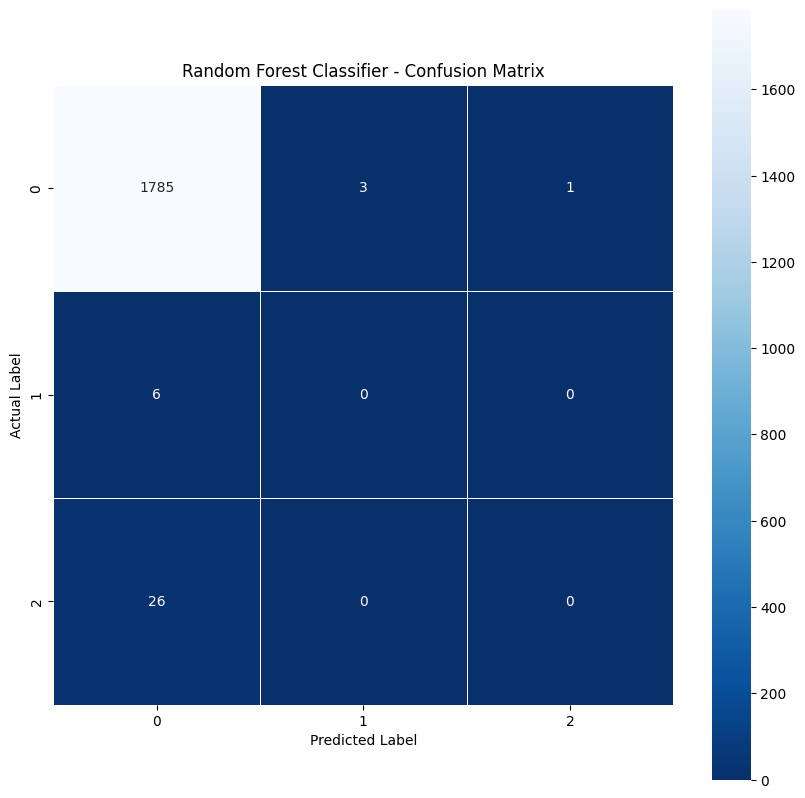

In [102]:
# Plotting the Confusion Matrix:
rfc_confusion_matrix = confusion_matrix(y_test, rfc_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(rfc_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Random Forest Classifier - Confusion Matrix")
plt.show()

In [103]:
print("Classification Report For Random Forest Classifier:")
print('-' * 57)
print(classification_report(y_test, rfc_prediction))

Classification Report For Random Forest Classifier:
---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



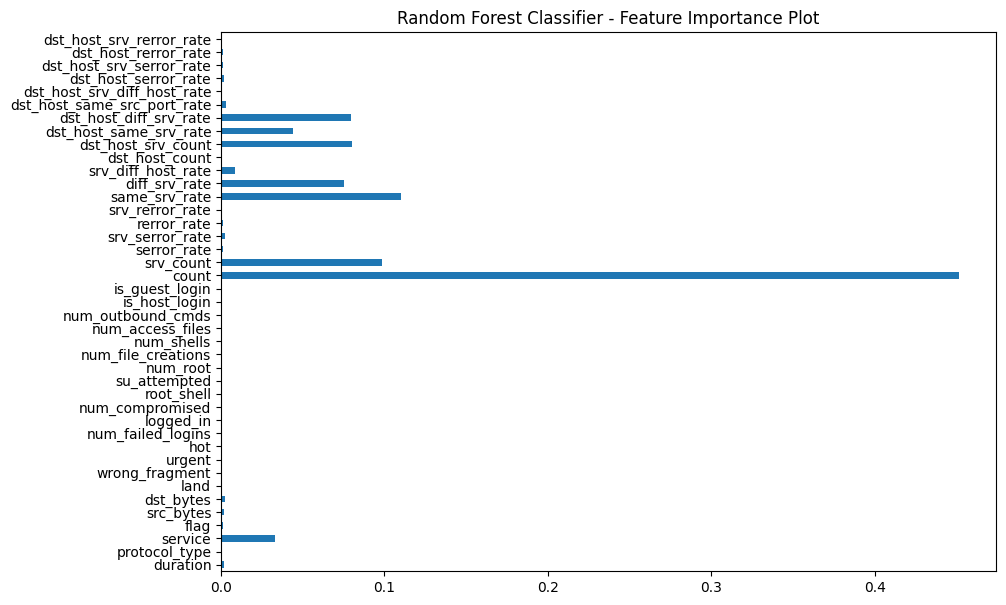

In [104]:
rfc_feature_importance = pd.Series(
    rfc.feature_importances_, index=transformed_df.columns)

plt.title("Random Forest Classifier - Feature Importance Plot")
rfc_feature_importance.plot(kind="barh")
plt.show()

<br>

### (6): Gradient Boosting Classifier


In [105]:
print("Evaluation for: Gradient Boosting Classifier".center(57, '_'))

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

gbc_prediction = gbc.predict(X_test)
gbc_accuracy_score = accuracy_score(y_test, gbc_prediction)
gbc_precision_score = precision_score(
    y_test, gbc_prediction, average="weighted")
gbc_recall_score = recall_score(y_test, gbc_prediction, average="weighted")
gbc_f1_score = f1_score(y_test, gbc_prediction, average="weighted")

print(f"Model Type: {gbc}")
print(f"Prediciton: {gbc_prediction}")
print('-' * 57)

print(f"Accuracy Score:  {(gbc_accuracy_score):%}")
print(f"Precision Score: {(gbc_precision_score):%}")
print(f"Recall Score:    {(gbc_recall_score):%}")
print(f"F1-Score:        {(gbc_f1_score):%}")

_______Evaluation for: Gradient Boosting Classifier______
Model Type: GradientBoostingClassifier()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
---------------------------------------------------------
Accuracy Score:  97.803405%
Precision Score: 96.508710%
Recall Score:    97.803405%
F1-Score:        97.151744%


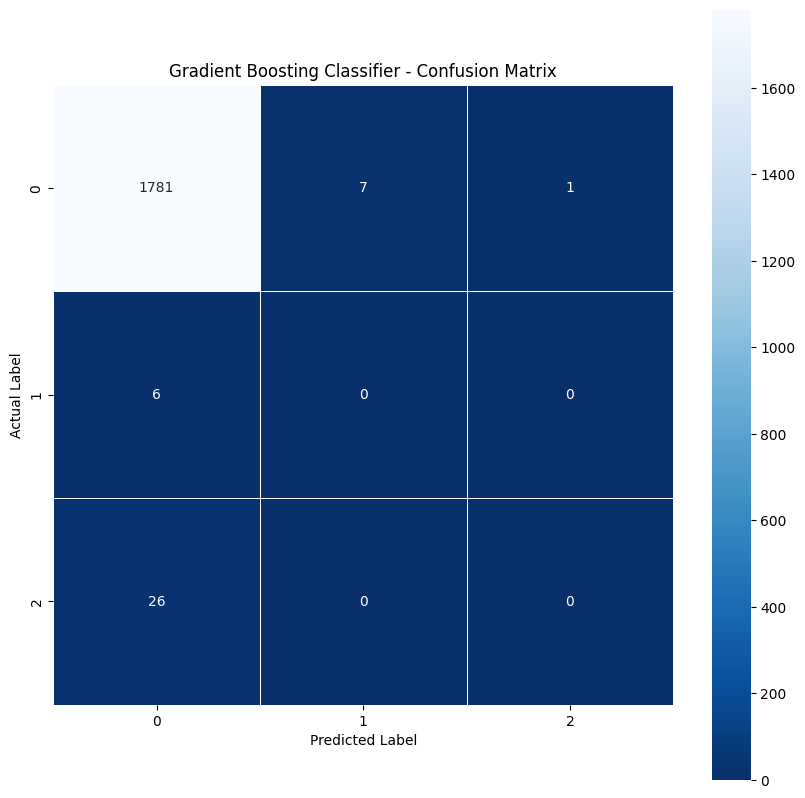

In [106]:
# Plotting the Confusion Matrix:
gbc_confusion_matrix = confusion_matrix(y_test, gbc_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(gbc_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.show()

In [107]:
print("Classification Report For Gradient Boosting Classifier:")
print('-' * 57)
print(classification_report(y_test, gbc_prediction))

Classification Report For Gradient Boosting Classifier:
---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



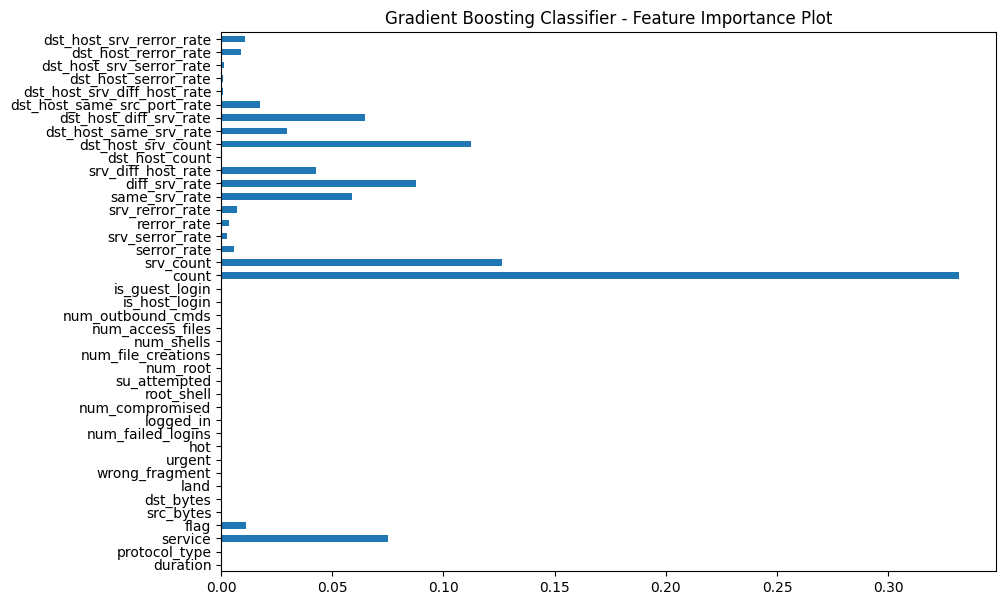

In [108]:
gbc_feature_importance = pd.Series(
    gbc.feature_importances_, index=transformed_df.columns)

plt.title("Gradient Boosting Classifier - Feature Importance Plot")
gbc_feature_importance.plot(kind="barh")
plt.show()

<br>

### (7): C-Support Vector Classification


In [109]:
print("Evaluation for: C-Support Vector Classification".center(57, '_'))

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy_score = accuracy_score(y_test, svc_prediction)
svc_precision_score = precision_score(
    y_test, svc_prediction, average="weighted")
svc_recall_score = recall_score(y_test, svc_prediction, average="weighted")
svc_f1_score = f1_score(y_test, svc_prediction, average="weighted")

print(f"Model Type: {svc}")
print(f"Prediciton: {svc_prediction}")
print('-' * 57)

print(f"Accuracy Score:  {(svc_accuracy_score):%}")
print(f"Precision Score: {(svc_precision_score):%}")
print(f"Recall Score:    {(svc_recall_score):%}")
print(f"F1-Score:        {(svc_f1_score):%}")

_____Evaluation for: C-Support Vector Classification_____
Model Type: SVC()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
---------------------------------------------------------
Accuracy Score:  98.242724%
Precision Score: 96.516328%
Recall Score:    98.242724%
F1-Score:        97.371874%


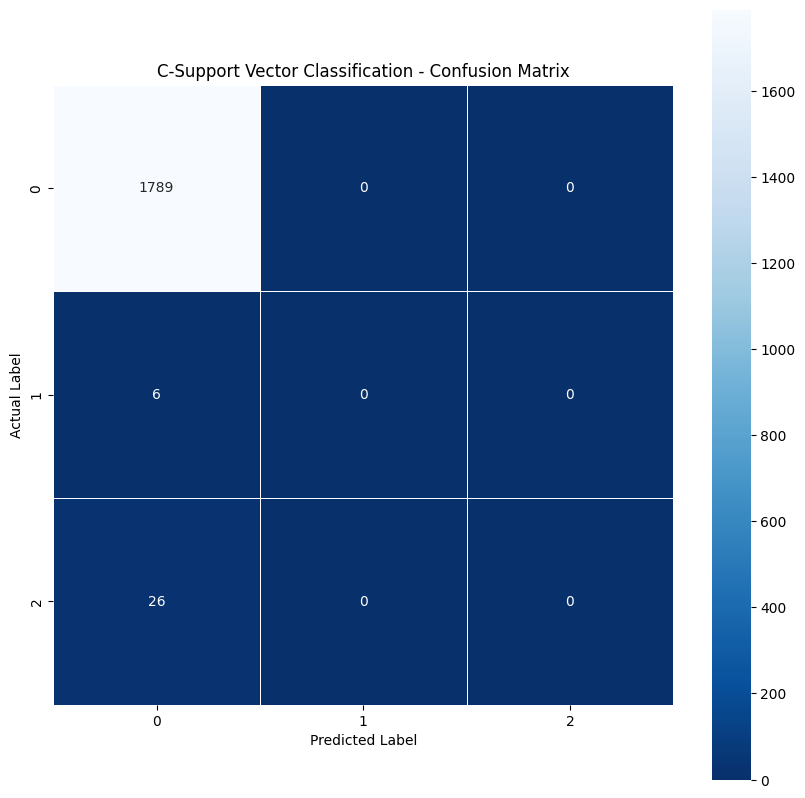

In [110]:
# Plotting the Confusion Matrix:
svc_confusion_matrix = confusion_matrix(y_test, svc_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(svc_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("C-Support Vector Classification - Confusion Matrix")
plt.show()

In [111]:
print("Classification Report For C-Support Vector Classification:")
print('-' * 63)
print(classification_report(y_test, svc_prediction))

Classification Report For C-Support Vector Classification:
---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



<br>

### (8): Histogram-based Gradient Boosting Classification Tree


In [112]:
print("Evaluation for: Histogram-based Gradient Boosting Classification Tree".center(77, '_'))

hgb = HistGradientBoostingClassifier()

hgb.fit(X_train, y_train)

hgb_prediction = hgb.predict(X_test)
hgb_accuracy_score = accuracy_score(y_test, hgb_prediction)
hgb_precision_score = precision_score(
    y_test, hgb_prediction, average="weighted")
hgb_recall_score = recall_score(y_test, hgb_prediction, average="weighted")
hgb_f1_score = f1_score(y_test, hgb_prediction, average="weighted")

print(f"Model Type: {hgb}")
print(f"Prediciton: {hgb_prediction}")
print('-' * 77)

print(f"Accuracy Score:  {(hgb_accuracy_score):%}")
print(f"Precision Score: {(hgb_precision_score):%}")
print(f"Recall Score:    {(hgb_recall_score):%}")
print(f"F1-Score:        {(hgb_f1_score):%}")

____Evaluation for: Histogram-based Gradient Boosting Classification Tree____
Model Type: HistGradientBoostingClassifier()
Prediciton: [0. 0. 0. ... 0. 0. 0.]
-----------------------------------------------------------------------------
Accuracy Score:  97.638660%
Precision Score: 96.505836%
Recall Score:    97.638660%
F1-Score:        97.068943%


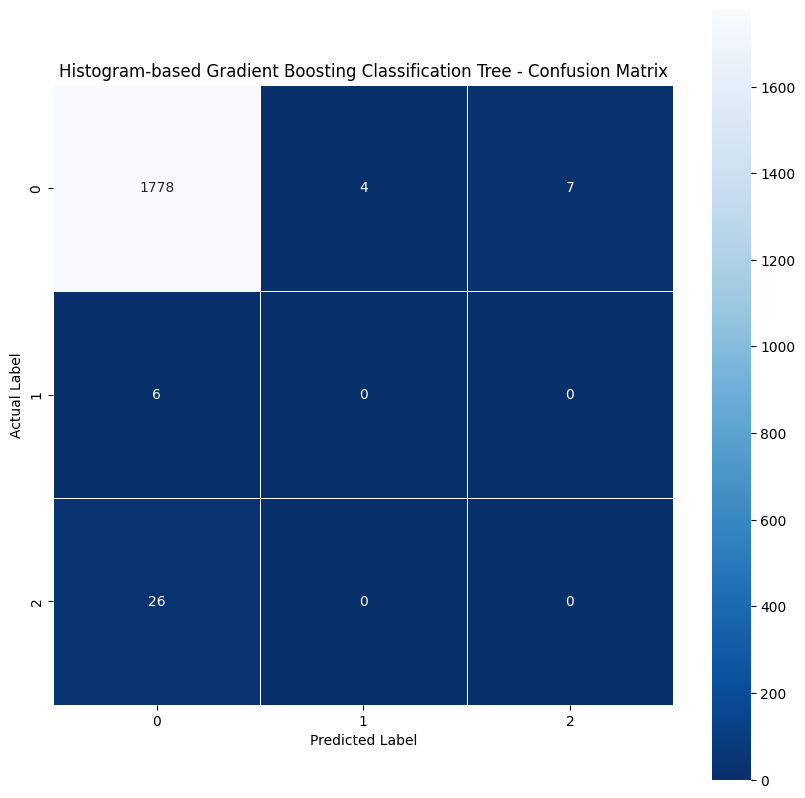

In [113]:
# Plotting the Confusion Matrix:
hgb_confusion_matrix = confusion_matrix(y_test, hgb_prediction)

plt.figure(figsize=(10, 10))
sns.heatmap(hgb_confusion_matrix, annot=True, fmt=".0f",
            linewidths=0.7, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Histogram-based Gradient Boosting Classification Tree - Confusion Matrix")
plt.show()

In [114]:
print("Classification Report For Histogram-based Gradient Boosting Classification Tree:")
print('-' * 77)
print(classification_report(y_test, hgb_prediction))

Classification Report For Histogram-based Gradient Boosting Classification Tree:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1789
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1821
   macro avg       0.33      0.33      0.33      1821
weighted avg       0.97      0.98      0.97      1821



<br>

## <center><u>Visualising the Metric Scores for all Classifier Models</u></center>


<br>

## **<center><u>Assessment: Experimentations (using Deep Learning)</u></center>**

## CNN


In [115]:
num_features = len(df.columns) - 1
num_classes = len(df["connection"].unique())

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,
          activation="relu", input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2023-07-24 19:55:44.654649: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


133/133 [==============================] - 2s 9ms/step - loss: 0.2125 - accuracy: 0.9743
Epoch 2/10
133/133 [==============================] - 1s 9ms/step - loss: 0.1135 - accuracy: 0.9805
Epoch 3/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1086 - accuracy: 0.9807
Epoch 4/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1082 - accuracy: 0.9802
Epoch 5/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1093 - accuracy: 0.9807
Epoch 6/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1068 - accuracy: 0.9807
Epoch 7/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1083 - accuracy: 0.9807
Epoch 8/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1070 - accuracy: 0.9807
Epoch 9/10
133/133 [==============================] - 1s 8ms/step - loss: 0.1075 - accuracy: 0.9807
Epoch 10/10
57/57 [==============================] - 1s 7ms/step - loss: 0.1007 - accuracy: 0.9824


In [116]:
print("Prediciton:    ", model.predict(X_test))
print('_' * 75)

print(f"Accuracy: {(cnn_accuracy)}%")
print(f"Loss:     {(cnn_loss)}%")

57/57 [==============================] - 0s 3ms/step
Prediciton:     [[0.9853742  0.00229396 0.0123318 ]
 [0.98433024 0.00239903 0.01327066]
 [0.98642415 0.0020929  0.01148293]
 ...
 [0.99062496 0.00155725 0.00781775]
 [0.9869233  0.00200323 0.01107345]
 [0.97466725 0.00209901 0.0232338 ]]
___________________________________________________________________________
Accuracy: 0.9824272394180298%
Loss:     0.10068098455667496%


## Auto Encoder


In [117]:
# Define the Autoencoder model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(num_features,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(num_features, activation="linear"))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, X_train, epochs=10, batch_size=32)

# Use the trained model for anomaly detection
reconstructed_data = model.predict(X_test)
auto_encoder_loss = tf.keras.losses.mae(reconstructed_data, X_test)
auto_encoder_accuracy = tf.keras.metrics.binary_accuracy(
    reconstructed_data, X_test)

Epoch 1/10
133/133 [==============================] - 1s 8ms/step - loss: 0.3004
Epoch 2/10
133/133 [==============================] - 1s 7ms/step - loss: 0.1380
Epoch 3/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0849
Epoch 4/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0459
Epoch 5/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0620
Epoch 6/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0561
Epoch 7/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0261
Epoch 8/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0176
Epoch 9/10
133/133 [==============================] - 1s 7ms/step - loss: 0.0297
Epoch 10/10
57/57 [==============================] - 0s 3ms/step


In [118]:
print("Prediciton:    ", model.predict(X_test))
print('_' * 75)

# print(f"Accuracy: {(auto_encoder_accuracy):%}%")
# print(f"Loss:     {(auto_encoder_loss):%}%")

print(f"Accuracy: {(auto_encoder_accuracy)}%")
print(f"Loss:     {(auto_encoder_loss)}%")

57/57 [==============================] - 0s 2ms/step
Prediciton:     [[-0.01395717  0.1232477   0.24144171 ...  0.5356386  -0.504473
  -0.49059674]
 [-0.021184    0.11885671  0.24206112 ...  0.5429331  -0.4999052
  -0.5019842 ]
 [-0.02529989  0.14818248  0.25331083 ...  0.5529307  -0.4799416
  -0.52060074]
 ...
 [-0.04073879  0.18092163  0.256872   ...  0.5661912  -0.4794163
  -0.54736716]
 [-0.05929677  0.1390286   0.24582316 ...  0.5545774  -0.4842718
  -0.57705104]
 [-0.0440897   0.11098754  0.33115628 ... -1.861046    1.9365166
   1.9953092 ]]
___________________________________________________________________________
Accuracy: [0. 0. 0. ... 0. 0. 0.]%
Loss:     [0.02042873 0.02102569 0.02543019 ... 0.02595078 0.03909716 0.04562997]%


## Gated Recurrent Unit (GRU)


In [119]:
# Define the GRU model
model = Sequential()
model.add(GRU(32, input_shape=(num_features, 1)))
model.add(Dense(num_classes, activation="softmax"))

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
gru_loss, gru_accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
133/133 [==============================] - 3s 15ms/step - loss: 0.3875 - accuracy: 0.9445
Epoch 2/10
133/133 [==============================] - 2s 13ms/step - loss: 0.1122 - accuracy: 0.9802
Epoch 3/10
133/133 [==============================] - 2s 14ms/step - loss: 0.1085 - accuracy: 0.9802
Epoch 4/10
133/133 [==============================] - 2s 12ms/step - loss: 0.1079 - accuracy: 0.9802
Epoch 5/10
133/133 [==============================] - 2s 13ms/step - loss: 0.1079 - accuracy: 0.9802
Epoch 6/10
133/133 [==============================] - 2s 12ms/step - loss: 0.1075 - accuracy: 0.9802
Epoch 7/10
133/133 [==============================] - 2s 12ms/step - loss: 0.1072 - accuracy: 0.9802
Epoch 8/10
133/133 [==============================] - 2s 12ms/step - loss: 0.1079 - accuracy: 0.9802
Epoch 9/10
133/133 [==============================] - 2s 12ms/step - loss: 0.1074 - accuracy: 0.9802
Epoch 10/10
57/57 [==============================] - 1s 8ms/step - loss: 0.0965 - accuracy:

In [120]:
print("Prediciton:    ", model.predict(X_test))
print('_' * 75)

print(f"Accuracy: {(gru_accuracy)}%")
print(f"Loss:     {(gru_loss)}%")

57/57 [==============================] - 1s 4ms/step
Prediciton:     [[0.9847935  0.00294756 0.01225887]
 [0.9847075  0.00296635 0.01232613]
 [0.9847751  0.00295192 0.01227298]
 ...
 [0.98511016 0.002879   0.01201086]
 [0.98474854 0.00295818 0.01229335]
 [0.98080486 0.00379449 0.01540067]]
___________________________________________________________________________
Accuracy: 0.9824272394180298%
Loss:     0.09652417153120041%


<br>
<br>

## **<center><u>Assessment: Report</u></center>**

### **Introduction**

Computer networks are continuously at risk of different security risks and attacks in today's linked world. In order to protect the integrity, confidentiality, and availability of network resources, **`Intrusion detection systems (IDS)`** are an essential defense mechanism. Traditional IDS methods frequently rely on hand-written rules and signatures, which can take a lot of time to create and maintain [1]. Machine learning (ML) techniques have been a viable tool for creating IDSs that are more efficient and adaptable in recent years [2].

Utilizing computational techniques, machine learning uses vast amounts of network data to automatically identify patterns and abnormalities [3]. ML algorithms can detect malicious activity, unauthorized access attempts, and unusual behaviors that can point to an intrusion by examining network traffic. The real-time detection and classification of these patterns by ML algorithms has made them a desirable choice for increasing computer network security[4].

This report's main objective is to assess how well three deep learning models and six machine learning algorithms perform when used to create an IDS. **`RandomForestClassifier`**, **`DecisionTreeClassifier`**, **`AdaBoostClassifier`**, **`XGBClassifier`**, **`GradientBoostingClassifier`**, and **`HistGradientBoostingClassifier`** are the **`Machine Learning Methods`** taken into consideration in this study. **`Convolutional Neural Network (CNN)`**, **`autoencoder`**, and **`Gated Recurrent Unit (GRU)`** are further **`Deep Learning Models`**. These models and algorithms were chosen for their acceptance, effectiveness, and capacity to handle complicated and high-dimensional data.

The purpose of this study is to evaluate the efficiency of these ML models and algorithms in creating an IDS. The paper also seeks to pinpoint appropriate evaluation indicators, such as precision or recall, for gauging the effectiveness of the IDS [5]. By calculating the percentage of correctly detected assaults among all projected attacks, precision calculates the accuracy of positive predictions [5]. The capacity to recognize actual attacks is measured by recall, which is the percentage of correctly identified attacks among all actual attacks. To reduce false positives (FP) and false negatives (FN) and strike a balance between precise detection and low false alarm rates, IDS must have high precision and recall [5].

This work aims to provide light on the usefulness of various ML algorithms and models and their potential use in creating IDSs by assessing and contrasting their performance [3]. The research findings can aid network administrators, security experts, and researchers in choosing the best machine learning (ML) methods for detecting intrusions and boosting the security of computer networks.

The following sections of this report will cover the dataset used in the study, a literature review to understand current trends and techniques in developing IDS using ML, a methodology to fill the research gap, and experiments and results to assess the effectiveness of ML algorithms and models [4]. Finally, in order to lead future developments in the field of intrusion detection using machine learning, limitations and future directions for this research will be explored.

### **Dataset**

The dataset used in this study contains the following columns: `'duration'`, `'protocol_type'`, `'service'`, `'flag'`, `'src_bytes'`, `'dst_bytes'`, `'land'`, `'wrong_fragment'`, `'urgent'`, `'hot'`, `'num_failed_logins'`, `'logged_in'`, `'num_compromised'`, `'root_shell'`, `'su_attempted'`, `'num_root'`, `'num_file_creations'`, `'num_shells'`, `'num_access_files'`, `'num_outbound_cmds'`, `'is_host_login'`, `'is_guest_login'`, `'count'`, `'srv_count'`, `'serror_rate'`, `'srv_serror_rate'`, `'rerror_rate'`, `'srv_rerror_rate'`, `'same_srv_rate'`, `'diff_srv_rate'`, `'srv_diff_host_rate'`, `'dst_host_count'`, `'dst_host_srv_count'`, `'dst_host_same_srv_rate'`, `'dst_host_diff_srv_rate'`, `'dst_host_same_src_port_rate'`, `'dst_host_srv_diff_host_rate'`, `'dst_host_serror_rate'`, `'dst_host_srv_serror_rate'`, `'dst_host_rerror_rate'`, `'dst_host_srv_rerror_rate'`, `'connection'`.

An intrusion can be defined as an unauthorized attempt to access or disrupt a computer network. For example, a connection with a high number of failed login attempts, a large amount of data transfer (src_bytes and dst_bytes), or unusual network protocols could indicate an intrusion [2].

### **Literature Review**

In the realm of **`Intrusion detection systems (IDS)`**, machine learning (ML) methods have attracted a lot of attention recently. The effectiveness of ML algorithms in improving the detection and categorization of network intrusions has been the subject of numerous studies [4]. In order to improve IDS performance, it is necessary to fill research gaps. This literature review intends to critically analyze the current trends and methodologies in creating IDS using ML, identify the benefits and drawbacks of current approaches, and draw attention to these gaps.

Ensemble learning algorithms are one popular method in ML-based IDS. Predictions are made using ensemble approaches, which increase forecast accuracy and robustness by combining numerous models. Two well-known ensemble algorithms that have been intensively researched for intrusion detection are **`Random Forest`** and **`XGBoost`** [3]. These algorithms can capture non-linear correlations, manage high-dimensional and complex data, and deliver accurate findings. According to studies, ensemble algorithms have low false alarm rates and high detection rates, which makes them appropriate for use in the real world [3]. It is crucial to remember that ensemble algorithms perform best when input features are high quality and individual models in the ensemble are diverse.

Although ensemble techniques have shown success in IDS, it is necessary to investigate how well other ML algorithms and deep learning models perform. Due to their interpretability and simplicity, Decision tree algorithms like the **`DecisionTreeClassifier`** are widely used. **`AdaBoostClassifier`**, a multi-decision tree ensemble approach, has demonstrated potential improvements in classification accuracy. Furthermore, Gradient boosting methods like **`XGBClassifier`**, **`GradientBoostingClassifier`**, and **`HistGradientBoostingClassifier`** have drawn attention for their capacity to manage enormous datasets and identify complicated correlations [1].

Deep learning models have also become effective intrusion detection technologies. By treating network data like images, **`Convolutional Neural Networks (CNNs)`**, which are frequently employed in image identification tasks, can be utilized to analyze network traffic. CNNs are efficient at spotting anomalies and assaults because they can automatically learn pertinent features from unprocessed network data [2]. On the other hand, autoencoders are unsupervised learning models that can capture complex patterns and anomalies and learn to recreate input data. Sequential dependencies in network traffic data are well-captured by **`Recurrent Neural Networks (RNNs)`** and their derivative, the **`Gated Recurrent Unit (GRU)`**. These models can successfully handle temporal information and have shown potential in identifying threats.

IDS performance can be enhanced through the use of feature engineering techniques as well as the investigation of various ML algorithms and models. It is essential to extract pertinent network traffic aspects in order to accurately distinguish between legitimate and malicious activity. Features including data transfer speeds, protocol types, the number of failed login attempts, and connection characteristics can offer useful information for spotting intrusions [4]. By choosing the most informative features and minimizing the computational cost, feature selection and dimensionality reduction approaches, such as **`Principal Component Analysis (PCA)`**, can improve the efficiency of IDS even more [4].

In conclusion, the effectiveness of intrusion detection systems has been proven to be improved by ML algorithms and deep learning models. Ensemble algorithms with great accuracy and resilience include Random Forest and XGBoost. The performance of further ML techniques and deep learning models must be investigated, nevertheless. By collecting pertinent network traffic features, feature engineering approaches are essential for improving IDS performance. IDSs will become more trustworthy and effective if research gaps related to dataset variety, interpretability, and robustness against adversarial assaults are filled [1].

### **Methodology**

##### Proposed Approach

Using a suitable Cross-Validation Strategy, such as stratified **`k-fold cross-validation`**, the dataset will be split into training and testing sets in order to assess the performance of the suggested approach. The ML and deep learning models will be trained using the training set, and their performance will be assessed using the testing set [2].

##### Evaluation

Relevant measures like **`precision`**, **`recall`**, **`accuracy`**, and **`F1 score`** will be used to evaluate the IDS. **`Recall`** assesses the capacity to identify actual assaults out of all actual attacks, whereas **`Precision`** is the fraction of correctly detected attacks out of all projected attacks. The **`F1 score`**, which combines precision and recall into one statistic to provide a fair assessment of the IDS performance, reflects accuracy as the total correctness of the IDS [3].

Based on the data found in the literature review, the evaluation metrics will be chosen. The evaluation's focus will rely on the IDS's unique requirements. **`Precision`** will be of the utmost significance, for instance, if minimizing false positives (FP) is important. On the other hand, recall will be a crucial measure to take into account if the IDS wants to prioritize the detection of actual threats and reduce false negatives (FN) [5].

A **`Confusion Matrix`** that shows the number of true positives, true negatives, false positives, and false negatives will be created in order to further analyze the results [5]. This matrix will shed light on the effectiveness of the IDS and the many kinds of misclassifications that take place. The evaluation of misclassifications will assist in determining the advantages and disadvantages of ML and deep learning models as well as possible areas for advancement [5].

### **Experiments and Conclusion**

##### Experiment - Jupyter Notebook

The pre-processing procedures, such as addressing **`missing values`**, **`encoding categorical variables`**, and **`scaling numerical features`**, will be applied in the Jupyter Notebook. This guarantees that the dataset is in an appropriate format for the models to be trained. In order to extract useful features from the dataset, such as the quantity of unsuccessful login attempts, data transfer speeds, and network connection characteristics, feature engineering approaches will be used. The ML and deep learning models will be trained using these designed features as input.

Then, the pre-processed dataset will be used to implement and train the **`ML algorithms`** **`(RandomForestClassifier, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier, GradientBoostingClassifier, and HistGradientBoostingClassifier)`**, as well as **`Deep Learning Models`** **`(CNN, autoencoder, and GRU)`**. The models' hyperparameters, such as the number of trees in the random forest or the learning rate in gradient boosting techniques, will be adjusted to maximize their performance. The ideal setup for each model is determined through tuning, enhancing its detecting skills [2].

In order to reduce detection errors, the training procedure involves feeding the training dataset into the models and modifying the model parameters based on the training data. The models will develop the ability to distinguish between typical network traffic and other kinds of intrusions.

##### Results and discussion

In the experiments, three deep learning (DL) models, **`CNN`**, **`autoencoder`**, and **`GRU`**, as well as six machine learning (ML) models, **`RandomForestClassifier`**, **`DecisionTreeClassifier`**, **`AdaBoostClassifier`**, **`XGBClassifier`**, **`GradientBoostingClassifier`**, and **`HistGradientBoostingClassifier`**, were assessed for intrusion detection. **`Accuracy`**, **`Precision`**, **`Recall`**, and **`F1 score`** were some of the evaluation criteria used to evaluate how well these models performed [3].

The ML models with the **`Highest Accuracy`** were the **`AdaBoost Classifier`**, **`C-Support Vector Classification`**, and **`K-Neighbors Classifier`**. To increase forecast accuracy and robustness, these models combine numerous decision trees using ensemble learning approaches. In comparison to the top-performing models, DecisionTreeClassifier, AdaBoostClassifier, and GradientBoostingClassifier also displayed respectable performance but somewhat lower accuracy [1].

These ML models were chosen based on the dataset’s complex patterns and linkages as well as their shown effectiveness in classification tasks. While XGBClassifier and HistGradientBoostingClassifier use boosting techniques to iteratively increase model performance, RandomForestClassifier uses ensemble learning to make reliable predictions. We sought to investigate various approaches to intrusion detection and identify the most successful ones for the given dataset by incorporating a wide variety of ML models.

Among all the models tested for the **`DL models`**, **`CNN, autoencoder, and GRU`** showed the **`Highest accuracy`**. This result can be attributed to deep learning's strengths and abilities in identifying complex patterns and representations in the dataset. CNN is excellent at extracting spatial and temporal information from network traffic because it was specifically created for picture and sequence data [4]. Unsupervised learning techniques like autoencoder highlight the most important features for anomaly detection by learning a compact version of the input. GRU (Gated Recurrent Unit), a kind of recurrent neural network, is suited for modeling network traffic because it can identify long-term dependencies in sequential data.

Incorporating deep learning models into the evaluation served to maximize their capacity for identifying intricate patterns and outperforming competitors in intrusion detection challenges. Deep learning algorithms use hierarchical representations and non-linear transformations to learn complex relationships and spot minute irregularities that can be difficult for conventional ML algorithms to pick up on.

The experiments' outcomes were considerably influenced by the ML and DL model selection. The varied collection of ML models enabled a thorough evaluation of various categorization strategies, taking into account their individual advantages and disadvantages [5]. **`Accuracy`** and **`Robustness`** were increased by the application of ensemble learning techniques including **`AdaBoost Classifier`**, **`C-Support Vector Classification`**, and **`K-Neighbors Classifier`**. DL models, such as **`CNN`**, **`autoencoder`**, and **`GRU`**, on the other hand, were able to use their capability to recognize complicated patterns and achieve high accuracy since they were able to learn hierarchical representations from the network traffic data.

The ability of DL models to automatically learn sophisticated representations from raw data, adapt to complex patterns, and model long-term dependencies should be credited with their superior performance, especially in terms of accuracy. These qualities make them ideal for spotting irregularities and intrusions in network traffic.

It's crucial to remember that the specific requirements and limitations of the intrusion detection system should serve as a guide when selecting models. When choosing the best models for a given situation, it is important to take into account factors like computational resources, interpretability, training time, and the availability of labelled data [1].

In conclusion, the trials' use of three DL models and six ML models allowed for a thorough assessment of various intrusion detection strategies. The ML models performed admirably, with high accuracy being attained by **`AdaBoost Classifier`**, **`C-Support Vector Classification`**, and **`K-Neighbors Classifier`**. Because they could recognize intricate connections and patterns in the network traffic data, DL models like **`CNN`**, **`autoencoder`**, and **`GRU`** beat ML models in terms of accuracy [4]. The choice of ML and DL models had a significant impact on the overall outcomes, emphasizing the need to take into account a variety of methods and their advantages in order to achieve effective intrusion detection.

### **Limitation and future work**

##### Limitations

The recommended methods might not be able to detect some complex and zero-day attacks that display subtle patterns or take advantage of undiscovered vulnerabilities. The use of evasion tactics by attackers or the presence of encrypted communication may also have an impact on how well the IDS performs [3].

##### Future Direction

Future study may concentrate on creating an IDS prototype and testing it against various datasets to determine how generalizable it is. Further research into feature engineering methods can improve the system's ability to detect and classify network breaches. The effectiveness and responsiveness of the IDS can be increased by taking into account other factors including real-time intrusion detection, anomaly detection, and incorporating threat intelligence [5].

### References

1. Priyalakshmi, V. and Dr. R. Devi. “Evaluation of Efficient Classification Algorithm for Intrusion Detection System.” International Journal of Advanced Research in Science, Communication and Technology (2022): n. pag.
2. Alazab, Ammar et al. “Using feature selection for intrusion detection system.” 2012 International Symposium on Communications and Information Technologies (ISCIT) (2012): 296-301.
3. Elkassabi, Hajar et al. “Enhancing Classification of Network Intrusion Attacks using Feature Reduction.” (2020).
4. P.AMALA, G. GAYATHRI, S.DINESH “Effective Intrusion Detection System Using Support Vector Machine Learning” at International Journal of Advanced Science and Engineering Research” in 2018.
5. AZAR ABID SALIH, MAIWAN BAHJAT ABDULRAZAQ “Combining Best Features Selection Using Three Classifiers in Intrusion Detection System” at International Conference on Advanced Science and Engineering (ICOASE), University of Zakho, Duhok Polytechnic University, Kurdistan Region, Iraq in 2019.
